In [65]:
# the standard boilerplate stuff

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import spearmanr
from IPython.display import HTML, display
from pandas import Series, DataFrame

np.set_printoptions(threshold=np.nan)
pd.set_option('display.max_columns',500)

In [66]:
# turn off matplotlib interactive mode
plt.ioff()

In [67]:
EPL_DIR = r"EPL\data"

In [68]:
epl18_19=pd.read_csv(EPL_DIR + r"\season-1819_csv.csv")

In [69]:
epl18_19.columns

Index(['Date', 'HomeTeam', 'AwayTeam', 'FTHG', 'FTAG', 'FTR', 'HTHG', 'HTAG',
       'HTR', 'Referee', 'HS', 'AS', 'HST', 'AST', 'HF', 'AF', 'HC', 'AC',
       'HY', 'AY', 'HR', 'AR'],
      dtype='object')

We can rename the column headers to be more meaningful

In [70]:
new_cols = {"FTHG":"FullTime_HomeTeam_Goals",
             "FTAG":"FullTime_AwayTeam_Goals",
             "FTR":"FullTime_Result",
             "HTHG":"HalfTime_HomeTeam_Goals",
             "HTAG":"HalfTime_AwayTeam_Goals",
             "HTR":"HalfTime_Result", 
             "HS":"HomeTeam_Shots",
             "AS":"AwayTeam_Shots",
             "HST":"HomeTeam_ShotsOnTarget",
             "AST":"AwayTeam_ShotsOnTarget",
             "HF":"HomeTeam_FoulsCommitted",
             "AF":"AwayTeam_FoulsCommitted",
             "HC":"HomeTeam_Corners",
             "AC":"AwayTeam_Corners",
             "HY":"HomeTeam_YellowCards",
             "AY":"AwayTeam_YellowCards",
             "HR":"HomeTeam_RedCards",
             "AR":"AwayTeam_RedCards",            
           }

We can convert the data into time series by usng date as Index

In [71]:
def load_data(basedir, filename, season):
    print("Loading",season,"data from",filename)
    df = pd.read_csv(basedir + '\\' + filename)
    df['Season']=season
    df = df[['Date', 'HomeTeam', 'AwayTeam', 'FTHG', 'FTAG', 'FTR', 'HTHG', 'HTAG', 'HTR', 'HS', 'AS', 'HST', 'AST', 'HF', 'AF', 'HC', 'AC',
       'HY', 'AY', 'HR', 'AR', 'Season']]
    df.rename(columns = new_cols, inplace=True)
    df.set_index('Date', inplace=True)
    print("Data Shape :",df.shape)
    display(HTML(df.head().to_html()))
    return df

In [72]:
df18_19 = load_data(EPL_DIR,"season-1819_csv.csv","2018-2019")
df17_18 = load_data(EPL_DIR,"season-1718_csv.csv","2017-2018")
df16_17 = load_data(EPL_DIR,"season-1617_csv.csv","2016-2017")
df15_16 = load_data(EPL_DIR,"season-1516_csv.csv","2015-2016")
df14_15 = load_data(EPL_DIR,"season-1415_csv.csv","2014-2015")
df13_14 = load_data(EPL_DIR,"season-1314_csv.csv","2013-2014")
df12_13 = load_data(EPL_DIR,"season-1213_csv.csv","2012-2013")
df11_12 = load_data(EPL_DIR,"season-1112_csv.csv","2011-2012")
df10_11 = load_data(EPL_DIR,"season-1011_csv.csv","2010-2011")

Loading 2018-2019 data from season-1819_csv.csv
Data Shape : (120, 21)


,HomeTeam,AwayTeam,FullTime_HomeTeam_Goals,FullTime_AwayTeam_Goals,FullTime_Result,HalfTime_HomeTeam_Goals,HalfTime_AwayTeam_Goals,HalfTime_Result,HomeTeam_Shots,AwayTeam_Shots,HomeTeam_ShotsOnTarget,AwayTeam_ShotsOnTarget,HomeTeam_FoulsCommitted,AwayTeam_FoulsCommitted,HomeTeam_Corners,AwayTeam_Corners,HomeTeam_YellowCards,AwayTeam_YellowCards,HomeTeam_RedCards,AwayTeam_RedCards,Season
Date,,,,,,,,,,,,,,,,,,,,,
2018-08-10,Man United,Leicester,2,1,H,1,0,H,8,13,6,4,11,8,2,5,2,1,0,0,2018-2019
2018-08-11,Bournemouth,Cardiff,2,0,H,1,0,H,12,10,4,1,11,9,7,4,1,1,0,0,2018-2019
2018-08-11,Fulham,Crystal Palace,0,2,A,0,1,A,15,10,6,9,9,11,5,5,1,2,0,0,2018-2019
2018-08-11,Huddersfield,Chelsea,0,3,A,0,2,A,6,13,1,4,9,8,2,5,2,1,0,0,2018-2019
2018-08-11,Newcastle,Tottenham,1,2,A,1,2,A,15,15,2,5,11,12,3,5,2,2,0,0,2018-2019


Loading 2017-2018 data from season-1718_csv.csv
Data Shape : (380, 21)


,HomeTeam,AwayTeam,FullTime_HomeTeam_Goals,FullTime_AwayTeam_Goals,FullTime_Result,HalfTime_HomeTeam_Goals,HalfTime_AwayTeam_Goals,HalfTime_Result,HomeTeam_Shots,AwayTeam_Shots,HomeTeam_ShotsOnTarget,AwayTeam_ShotsOnTarget,HomeTeam_FoulsCommitted,AwayTeam_FoulsCommitted,HomeTeam_Corners,AwayTeam_Corners,HomeTeam_YellowCards,AwayTeam_YellowCards,HomeTeam_RedCards,AwayTeam_RedCards,Season
Date,,,,,,,,,,,,,,,,,,,,,
2017-08-11,Arsenal,Leicester,4,3,H,2,2,D,27,6,10,3,9,12,9,4,0,1,0,0,2017-2018
2017-08-12,Brighton,Man City,0,2,A,0,0,D,6,14,2,4,6,9,3,10,0,2,0,0,2017-2018
2017-08-12,Chelsea,Burnley,2,3,A,0,3,A,19,10,6,5,16,11,8,5,3,3,2,0,2017-2018
2017-08-12,Crystal Palace,Huddersfield,0,3,A,0,2,A,14,8,4,6,7,19,12,9,1,3,0,0,2017-2018
2017-08-12,Everton,Stoke,1,0,H,1,0,H,9,9,4,1,13,10,6,7,1,1,0,0,2017-2018


Loading 2016-2017 data from season-1617_csv.csv
Data Shape : (380, 21)


,HomeTeam,AwayTeam,FullTime_HomeTeam_Goals,FullTime_AwayTeam_Goals,FullTime_Result,HalfTime_HomeTeam_Goals,HalfTime_AwayTeam_Goals,HalfTime_Result,HomeTeam_Shots,AwayTeam_Shots,HomeTeam_ShotsOnTarget,AwayTeam_ShotsOnTarget,HomeTeam_FoulsCommitted,AwayTeam_FoulsCommitted,HomeTeam_Corners,AwayTeam_Corners,HomeTeam_YellowCards,AwayTeam_YellowCards,HomeTeam_RedCards,AwayTeam_RedCards,Season
Date,,,,,,,,,,,,,,,,,,,,,
2016-08-13,Burnley,Swansea,0,1,A,0,0,D,10,17,3,9,10,14,7,4,3,2,0,0,2016-2017
2016-08-13,Crystal Palace,West Brom,0,1,A,0,0,D,14,13,4,3,12,15,3,6,2,2,0,0,2016-2017
2016-08-13,Everton,Tottenham,1,1,D,1,0,H,12,13,6,4,10,14,5,6,0,0,0,0,2016-2017
2016-08-13,Hull,Leicester,2,1,H,1,0,H,14,18,5,5,8,17,5,3,2,2,0,0,2016-2017
2016-08-13,Man City,Sunderland,2,1,H,1,0,H,16,7,4,3,11,14,9,6,1,2,0,0,2016-2017


Loading 2015-2016 data from season-1516_csv.csv
Data Shape : (380, 21)


,HomeTeam,AwayTeam,FullTime_HomeTeam_Goals,FullTime_AwayTeam_Goals,FullTime_Result,HalfTime_HomeTeam_Goals,HalfTime_AwayTeam_Goals,HalfTime_Result,HomeTeam_Shots,AwayTeam_Shots,HomeTeam_ShotsOnTarget,AwayTeam_ShotsOnTarget,HomeTeam_FoulsCommitted,AwayTeam_FoulsCommitted,HomeTeam_Corners,AwayTeam_Corners,HomeTeam_YellowCards,AwayTeam_YellowCards,HomeTeam_RedCards,AwayTeam_RedCards,Season
Date,,,,,,,,,,,,,,,,,,,,,
2015-08-08,Bournemouth,Aston Villa,0,1,A,0,0,D,11,7,2,3,13,13,6,3,3,4,0,0,2015-2016
2015-08-08,Chelsea,Swansea,2,2,D,2,1,H,11,18,3,10,15,16,4,8,1,3,1,0,2015-2016
2015-08-08,Everton,Watford,2,2,D,0,1,A,10,11,5,5,7,13,8,2,1,2,0,0,2015-2016
2015-08-08,Leicester,Sunderland,4,2,H,3,0,H,19,10,8,5,13,17,6,3,2,4,0,0,2015-2016
2015-08-08,Man United,Tottenham,1,0,H,1,0,H,9,9,1,4,12,12,1,2,2,3,0,0,2015-2016


Loading 2014-2015 data from season-1415_csv.csv
Data Shape : (380, 21)


,HomeTeam,AwayTeam,FullTime_HomeTeam_Goals,FullTime_AwayTeam_Goals,FullTime_Result,HalfTime_HomeTeam_Goals,HalfTime_AwayTeam_Goals,HalfTime_Result,HomeTeam_Shots,AwayTeam_Shots,HomeTeam_ShotsOnTarget,AwayTeam_ShotsOnTarget,HomeTeam_FoulsCommitted,AwayTeam_FoulsCommitted,HomeTeam_Corners,AwayTeam_Corners,HomeTeam_YellowCards,AwayTeam_YellowCards,HomeTeam_RedCards,AwayTeam_RedCards,Season
Date,,,,,,,,,,,,,,,,,,,,,
2014-08-16,Arsenal,Crystal Palace,2,1,H,1,1,D,14,4,6,2,13,19,9,3,2,2,0,1,2014-2015
2014-08-16,Leicester,Everton,2,2,D,1,2,A,11,13,3,3,16,10,3,6,1,1,0,0,2014-2015
2014-08-16,Man United,Swansea,1,2,A,0,1,A,14,5,5,4,14,20,4,0,2,4,0,0,2014-2015
2014-08-16,QPR,Hull,0,1,A,0,0,D,19,11,6,4,10,10,8,9,1,2,0,0,2014-2015
2014-08-16,Stoke,Aston Villa,0,1,A,0,0,D,12,7,2,2,14,9,2,8,0,3,0,0,2014-2015


Loading 2013-2014 data from season-1314_csv.csv
Data Shape : (380, 21)


,HomeTeam,AwayTeam,FullTime_HomeTeam_Goals,FullTime_AwayTeam_Goals,FullTime_Result,HalfTime_HomeTeam_Goals,HalfTime_AwayTeam_Goals,HalfTime_Result,HomeTeam_Shots,AwayTeam_Shots,HomeTeam_ShotsOnTarget,AwayTeam_ShotsOnTarget,HomeTeam_FoulsCommitted,AwayTeam_FoulsCommitted,HomeTeam_Corners,AwayTeam_Corners,HomeTeam_YellowCards,AwayTeam_YellowCards,HomeTeam_RedCards,AwayTeam_RedCards,Season
Date,,,,,,,,,,,,,,,,,,,,,
2013-08-17,Arsenal,Aston Villa,1,3,A,1,1,D,16,9,4,4,15,18,4,3,4,5,1,0,2013-2014
2013-08-17,Liverpool,Stoke,1,0,H,1,0,H,26,10,11,4,11,11,12,6,1,1,0,0,2013-2014
2013-08-17,Norwich,Everton,2,2,D,0,0,D,8,19,2,6,13,10,6,8,2,0,0,0,2013-2014
2013-08-17,Sunderland,Fulham,0,1,A,0,0,D,20,5,3,1,14,14,6,1,0,3,0,0,2013-2014
2013-08-17,Swansea,Man United,1,4,A,0,2,A,17,15,6,7,13,10,7,4,1,3,0,0,2013-2014


Loading 2012-2013 data from season-1213_csv.csv
Data Shape : (380, 21)


,HomeTeam,AwayTeam,FullTime_HomeTeam_Goals,FullTime_AwayTeam_Goals,FullTime_Result,HalfTime_HomeTeam_Goals,HalfTime_AwayTeam_Goals,HalfTime_Result,HomeTeam_Shots,AwayTeam_Shots,HomeTeam_ShotsOnTarget,AwayTeam_ShotsOnTarget,HomeTeam_FoulsCommitted,AwayTeam_FoulsCommitted,HomeTeam_Corners,AwayTeam_Corners,HomeTeam_YellowCards,AwayTeam_YellowCards,HomeTeam_RedCards,AwayTeam_RedCards,Season
Date,,,,,,,,,,,,,,,,,,,,,
2012-08-18,Arsenal,Sunderland,0,0,D,0,0,D,14,3,4,2,12,8,7,0,0,0,0,0,2012-2013
2012-08-18,Fulham,Norwich,5,0,H,2,0,H,11,4,9,2,12,11,6,3,0,0,0,0,2012-2013
2012-08-18,Newcastle,Tottenham,2,1,H,0,0,D,6,12,4,6,12,8,3,5,2,2,0,0,2012-2013
2012-08-18,QPR,Swansea,0,5,A,0,1,A,20,12,11,8,11,14,5,3,2,2,0,0,2012-2013
2012-08-18,Reading,Stoke,1,1,D,0,1,A,9,6,3,3,9,14,4,3,2,4,0,1,2012-2013


Loading 2011-2012 data from season-1112_csv.csv
Data Shape : (380, 21)


,HomeTeam,AwayTeam,FullTime_HomeTeam_Goals,FullTime_AwayTeam_Goals,FullTime_Result,HalfTime_HomeTeam_Goals,HalfTime_AwayTeam_Goals,HalfTime_Result,HomeTeam_Shots,AwayTeam_Shots,HomeTeam_ShotsOnTarget,AwayTeam_ShotsOnTarget,HomeTeam_FoulsCommitted,AwayTeam_FoulsCommitted,HomeTeam_Corners,AwayTeam_Corners,HomeTeam_YellowCards,AwayTeam_YellowCards,HomeTeam_RedCards,AwayTeam_RedCards,Season
Date,,,,,,,,,,,,,,,,,,,,,
2011-08-13,Blackburn,Wolves,1,2,A,1,1,D,16,13,8,4,14,10,12,6,4,2,0,0,2011-2012
2011-08-13,Fulham,Aston Villa,0,0,D,0,0,D,13,7,9,1,10,18,2,3,2,4,0,0,2011-2012
2011-08-13,Liverpool,Sunderland,1,1,D,1,0,H,11,15,4,6,17,12,6,3,4,4,0,0,2011-2012
2011-08-13,Newcastle,Arsenal,0,0,D,0,0,D,6,9,1,4,9,11,2,5,3,5,0,1,2011-2012
2011-08-13,QPR,Bolton,0,4,A,0,1,A,13,13,7,7,9,16,3,2,1,2,1,0,2011-2012


Loading 2010-2011 data from season-1011_csv.csv
Data Shape : (380, 21)


,HomeTeam,AwayTeam,FullTime_HomeTeam_Goals,FullTime_AwayTeam_Goals,FullTime_Result,HalfTime_HomeTeam_Goals,HalfTime_AwayTeam_Goals,HalfTime_Result,HomeTeam_Shots,AwayTeam_Shots,HomeTeam_ShotsOnTarget,AwayTeam_ShotsOnTarget,HomeTeam_FoulsCommitted,AwayTeam_FoulsCommitted,HomeTeam_Corners,AwayTeam_Corners,HomeTeam_YellowCards,AwayTeam_YellowCards,HomeTeam_RedCards,AwayTeam_RedCards,Season
Date,,,,,,,,,,,,,,,,,,,,,
2010-08-14,Aston Villa,West Ham,3,0,H,2,0,H,23,12,11,2,15,15,16,7,1,2,0,0,2010-2011
2010-08-14,Blackburn,Everton,1,0,H,1,0,H,7,17,2,12,19,14,1,3,2,1,0,0,2010-2011
2010-08-14,Bolton,Fulham,0,0,D,0,0,D,13,12,9,7,12,13,4,8,1,3,0,0,2010-2011
2010-08-14,Chelsea,West Brom,6,0,H,2,0,H,18,10,13,4,10,10,3,1,1,0,0,0,2010-2011
2010-08-14,Sunderland,Birmingham,2,2,D,1,0,H,6,13,2,7,13,10,3,6,3,3,1,0,2010-2011


So data has been loaded correctly. Next, lets concatenate all EPL data tagether. Except 2018-19 season, which is ongoing, all other datasets have 380 rows. So final dataset will have 8*380 + 120 ie 3160 rows

In [73]:

epl = df10_11.append(df11_12).append(df12_13).append(df13_14).append(df14_15).append(df15_16).append(df16_17).append(df17_18).append(df18_19)
epl.sort_index()
print(epl.shape)

(3160, 21)


So EPL data has been loaded correctly. Lets repeat the same process for other leagues

In [74]:
LALIGA_DIR = r"La-Liga\data"

In [75]:
df18_19 = load_data(LALIGA_DIR, "season-1819_csv.csv","2018-2019")

Loading 2018-2019 data from season-1819_csv.csv
Data Shape : (100, 21)


,HomeTeam,AwayTeam,FullTime_HomeTeam_Goals,FullTime_AwayTeam_Goals,FullTime_Result,HalfTime_HomeTeam_Goals,HalfTime_AwayTeam_Goals,HalfTime_Result,HomeTeam_Shots,AwayTeam_Shots,HomeTeam_ShotsOnTarget,AwayTeam_ShotsOnTarget,HomeTeam_FoulsCommitted,AwayTeam_FoulsCommitted,HomeTeam_Corners,AwayTeam_Corners,HomeTeam_YellowCards,AwayTeam_YellowCards,HomeTeam_RedCards,AwayTeam_RedCards,Season
Date,,,,,,,,,,,,,,,,,,,,,
17/08/18,Betis,Levante,0,3,A,0,1,A,22,6,8,4,10,10,5,3,0,2,0,0,2018-2019
17/08/18,Girona,Valladolid,0,0,D,0,0,D,13,2,1,1,21,20,3,2,1,1,0,0,2018-2019
18/08/18,Barcelona,Alaves,3,0,H,0,0,D,25,3,9,0,6,13,7,1,0,2,0,0,2018-2019
18/08/18,Celta,Espanol,1,1,D,0,1,A,12,14,2,5,13,14,8,7,3,2,0,0,2018-2019
18/08/18,Villarreal,Sociedad,1,2,A,1,1,D,16,8,7,4,16,10,4,6,2,3,0,0,2018-2019


So data has similar layout as EPL data

In [76]:
df18_19 = load_data(LALIGA_DIR,"season-1819_csv.csv","2018-2019")
df17_18 = load_data(LALIGA_DIR,"season-1718_csv.csv","2017-2018")
df16_17 = load_data(LALIGA_DIR,"season-1617_csv.csv","2016-2017")
df15_16 = load_data(LALIGA_DIR,"season-1516_csv.csv","2015-2016")
df14_15 = load_data(LALIGA_DIR,"season-1415_csv.csv","2014-2015")
df13_14 = load_data(LALIGA_DIR,"season-1314_csv.csv","2013-2014")
df12_13 = load_data(LALIGA_DIR,"season-1213_csv.csv","2012-2013")
df11_12 = load_data(LALIGA_DIR,"season-1112_csv.csv","2011-2012")
df10_11 = load_data(LALIGA_DIR,"season-1011_csv.csv","2010-2011")

Loading 2018-2019 data from season-1819_csv.csv
Data Shape : (100, 21)


,HomeTeam,AwayTeam,FullTime_HomeTeam_Goals,FullTime_AwayTeam_Goals,FullTime_Result,HalfTime_HomeTeam_Goals,HalfTime_AwayTeam_Goals,HalfTime_Result,HomeTeam_Shots,AwayTeam_Shots,HomeTeam_ShotsOnTarget,AwayTeam_ShotsOnTarget,HomeTeam_FoulsCommitted,AwayTeam_FoulsCommitted,HomeTeam_Corners,AwayTeam_Corners,HomeTeam_YellowCards,AwayTeam_YellowCards,HomeTeam_RedCards,AwayTeam_RedCards,Season
Date,,,,,,,,,,,,,,,,,,,,,
17/08/18,Betis,Levante,0,3,A,0,1,A,22,6,8,4,10,10,5,3,0,2,0,0,2018-2019
17/08/18,Girona,Valladolid,0,0,D,0,0,D,13,2,1,1,21,20,3,2,1,1,0,0,2018-2019
18/08/18,Barcelona,Alaves,3,0,H,0,0,D,25,3,9,0,6,13,7,1,0,2,0,0,2018-2019
18/08/18,Celta,Espanol,1,1,D,0,1,A,12,14,2,5,13,14,8,7,3,2,0,0,2018-2019
18/08/18,Villarreal,Sociedad,1,2,A,1,1,D,16,8,7,4,16,10,4,6,2,3,0,0,2018-2019


Loading 2017-2018 data from season-1718_csv.csv
Data Shape : (380, 21)


,HomeTeam,AwayTeam,FullTime_HomeTeam_Goals,FullTime_AwayTeam_Goals,FullTime_Result,HalfTime_HomeTeam_Goals,HalfTime_AwayTeam_Goals,HalfTime_Result,HomeTeam_Shots,AwayTeam_Shots,HomeTeam_ShotsOnTarget,AwayTeam_ShotsOnTarget,HomeTeam_FoulsCommitted,AwayTeam_FoulsCommitted,HomeTeam_Corners,AwayTeam_Corners,HomeTeam_YellowCards,AwayTeam_YellowCards,HomeTeam_RedCards,AwayTeam_RedCards,Season
Date,,,,,,,,,,,,,,,,,,,,,
18/08/17,Leganes,Alaves,1,0,H,1,0,H,16,6,9,3,14,18,4,2,0,1,0,0,2017-2018
18/08/17,Valencia,Las Palmas,1,0,H,1,0,H,22,5,6,4,25,13,5,2,3,3,0,1,2017-2018
19/08/17,Celta,Sociedad,2,3,A,1,1,D,16,13,5,6,12,11,5,4,3,1,0,0,2017-2018
19/08/17,Girona,Ath Madrid,2,2,D,2,0,H,13,9,6,3,15,15,6,0,2,4,0,1,2017-2018
19/08/17,Sevilla,Espanol,1,1,D,1,1,D,9,9,4,6,14,12,7,3,2,4,1,0,2017-2018


Loading 2016-2017 data from season-1617_csv.csv
Data Shape : (380, 21)


,HomeTeam,AwayTeam,FullTime_HomeTeam_Goals,FullTime_AwayTeam_Goals,FullTime_Result,HalfTime_HomeTeam_Goals,HalfTime_AwayTeam_Goals,HalfTime_Result,HomeTeam_Shots,AwayTeam_Shots,HomeTeam_ShotsOnTarget,AwayTeam_ShotsOnTarget,HomeTeam_FoulsCommitted,AwayTeam_FoulsCommitted,HomeTeam_Corners,AwayTeam_Corners,HomeTeam_YellowCards,AwayTeam_YellowCards,HomeTeam_RedCards,AwayTeam_RedCards,Season
Date,,,,,,,,,,,,,,,,,,,,,
19/08/16,La Coruna,Eibar,2,1,H,0,0,D,11,12,6,6,14,17,1,8,3,3,0,0,2016-2017
19/08/16,Malaga,Osasuna,1,1,D,0,0,D,14,8,4,3,11,22,5,3,2,3,0,0,2016-2017
20/08/16,Barcelona,Betis,6,2,H,3,1,H,30,6,12,2,17,13,10,2,1,3,0,0,2016-2017
20/08/16,Granada,Villarreal,1,1,D,0,0,D,7,12,1,3,17,11,7,3,2,3,0,0,2016-2017
20/08/16,Sevilla,Espanol,6,4,H,3,3,D,16,10,11,7,8,15,8,2,2,2,0,0,2016-2017


Loading 2015-2016 data from season-1516_csv.csv
Data Shape : (380, 21)


,HomeTeam,AwayTeam,FullTime_HomeTeam_Goals,FullTime_AwayTeam_Goals,FullTime_Result,HalfTime_HomeTeam_Goals,HalfTime_AwayTeam_Goals,HalfTime_Result,HomeTeam_Shots,AwayTeam_Shots,HomeTeam_ShotsOnTarget,AwayTeam_ShotsOnTarget,HomeTeam_FoulsCommitted,AwayTeam_FoulsCommitted,HomeTeam_Corners,AwayTeam_Corners,HomeTeam_YellowCards,AwayTeam_YellowCards,HomeTeam_RedCards,AwayTeam_RedCards,Season
Date,,,,,,,,,,,,,,,,,,,,,
21/08/15,Malaga,Sevilla,0,0,D,0,0,D,25,10,5,2,19,11,7,2,3,3,0,1,2015-2016
22/08/15,Ath Madrid,Las Palmas,1,0,H,1,0,H,14,8,3,1,11,16,4,4,2,0,0,0,2015-2016
22/08/15,Espanol,Getafe,1,0,H,1,0,H,4,14,2,3,19,14,5,6,2,3,0,1,2015-2016
22/08/15,La Coruna,Sociedad,0,0,D,0,0,D,15,9,5,2,16,10,5,4,3,2,0,0,2015-2016
22/08/15,Vallecano,Valencia,0,0,D,0,0,D,8,10,3,4,19,11,3,3,3,1,0,0,2015-2016


Loading 2014-2015 data from season-1415_csv.csv
Data Shape : (380, 21)


,HomeTeam,AwayTeam,FullTime_HomeTeam_Goals,FullTime_AwayTeam_Goals,FullTime_Result,HalfTime_HomeTeam_Goals,HalfTime_AwayTeam_Goals,HalfTime_Result,HomeTeam_Shots,AwayTeam_Shots,HomeTeam_ShotsOnTarget,AwayTeam_ShotsOnTarget,HomeTeam_FoulsCommitted,AwayTeam_FoulsCommitted,HomeTeam_Corners,AwayTeam_Corners,HomeTeam_YellowCards,AwayTeam_YellowCards,HomeTeam_RedCards,AwayTeam_RedCards,Season
Date,,,,,,,,,,,,,,,,,,,,,
23/08/14,Almeria,Espanol,1,1,D,0,0,D,19,12,6,2,8,9,11,7,3,2,0,1,2014-2015
23/08/14,Granada,La Coruna,2,1,H,0,1,A,10,7,3,1,13,26,5,3,1,2,0,0,2014-2015
23/08/14,Malaga,Ath Bilbao,1,0,H,1,0,H,12,12,3,5,13,9,5,4,3,3,2,0,2014-2015
23/08/14,Sevilla,Valencia,1,1,D,1,0,H,10,11,3,1,23,8,3,3,4,2,0,1,2014-2015
24/08/14,Barcelona,Elche,3,0,H,1,0,H,12,3,6,0,11,13,3,1,0,1,1,0,2014-2015


Loading 2013-2014 data from season-1314_csv.csv
Data Shape : (380, 21)


,HomeTeam,AwayTeam,FullTime_HomeTeam_Goals,FullTime_AwayTeam_Goals,FullTime_Result,HalfTime_HomeTeam_Goals,HalfTime_AwayTeam_Goals,HalfTime_Result,HomeTeam_Shots,AwayTeam_Shots,HomeTeam_ShotsOnTarget,AwayTeam_ShotsOnTarget,HomeTeam_FoulsCommitted,AwayTeam_FoulsCommitted,HomeTeam_Corners,AwayTeam_Corners,HomeTeam_YellowCards,AwayTeam_YellowCards,HomeTeam_RedCards,AwayTeam_RedCards,Season
Date,,,,,,,,,,,,,,,,,,,,,
17/08/13,Sociedad,Getafe,2,0,H,1,0,H,16,15,6,2,13,6,6,5,1,1,0,0,2013-2014
17/08/13,Valencia,Malaga,1,0,H,0,0,D,9,11,1,2,15,23,9,6,3,5,0,0,2013-2014
17/08/13,Valladolid,Ath Bilbao,1,2,A,1,1,D,8,13,2,3,10,8,5,5,1,0,0,0,2013-2014
18/08/13,Barcelona,Levante,7,0,H,6,0,H,22,4,13,1,15,16,9,3,1,3,0,0,2013-2014
18/08/13,Osasuna,Granada,1,2,A,0,2,A,14,13,5,4,15,17,7,6,1,4,0,0,2013-2014


Loading 2012-2013 data from season-1213_csv.csv
Data Shape : (380, 21)


,HomeTeam,AwayTeam,FullTime_HomeTeam_Goals,FullTime_AwayTeam_Goals,FullTime_Result,HalfTime_HomeTeam_Goals,HalfTime_AwayTeam_Goals,HalfTime_Result,HomeTeam_Shots,AwayTeam_Shots,HomeTeam_ShotsOnTarget,AwayTeam_ShotsOnTarget,HomeTeam_FoulsCommitted,AwayTeam_FoulsCommitted,HomeTeam_Corners,AwayTeam_Corners,HomeTeam_YellowCards,AwayTeam_YellowCards,HomeTeam_RedCards,AwayTeam_RedCards,Season
Date,,,,,,,,,,,,,,,,,,,,,
18/08/12,Celta,Malaga,0,1,A,0,0,D,17,16,3,6,13,9,8,9,2,0,0,0,2012-2013
18/08/12,Mallorca,Espanol,2,1,H,1,1,D,17,13,9,5,14,14,7,4,3,2,0,0,2012-2013
18/08/12,Sevilla,Getafe,2,1,H,2,0,H,16,10,5,3,15,17,8,8,4,4,0,0,2012-2013
19/08/12,Ath Bilbao,Betis,3,5,A,0,3,A,17,13,8,9,12,17,11,4,2,2,0,0,2012-2013
19/08/12,Barcelona,Sociedad,5,1,H,4,1,H,18,5,10,2,9,12,9,1,2,3,0,0,2012-2013


Loading 2011-2012 data from season-1112_csv.csv
Data Shape : (380, 21)


,HomeTeam,AwayTeam,FullTime_HomeTeam_Goals,FullTime_AwayTeam_Goals,FullTime_Result,HalfTime_HomeTeam_Goals,HalfTime_AwayTeam_Goals,HalfTime_Result,HomeTeam_Shots,AwayTeam_Shots,HomeTeam_ShotsOnTarget,AwayTeam_ShotsOnTarget,HomeTeam_FoulsCommitted,AwayTeam_FoulsCommitted,HomeTeam_Corners,AwayTeam_Corners,HomeTeam_YellowCards,AwayTeam_YellowCards,HomeTeam_RedCards,AwayTeam_RedCards,Season
Date,,,,,,,,,,,,,,,,,,,,,
27/08/11,Granada,Betis,0,1,A,0,0,D,11,18,2,3,12,16,8,5,2,2,0,0,2011-2012
27/08/11,Sp Gijon,Sociedad,1,2,A,0,1,A,17,6,4,2,14,11,9,2,2,1,1,1,2011-2012
27/08/11,Valencia,Santander,4,3,H,1,2,A,26,4,11,3,14,11,10,3,3,3,0,0,2011-2012
28/08/11,Ath Bilbao,Vallecano,1,1,D,0,0,D,10,13,4,6,17,19,9,4,1,3,0,0,2011-2012
28/08/11,Ath Madrid,Osasuna,0,0,D,0,0,D,28,16,8,2,9,8,12,5,1,0,0,0,2011-2012


Loading 2010-2011 data from season-1011_csv.csv
Data Shape : (380, 21)


,HomeTeam,AwayTeam,FullTime_HomeTeam_Goals,FullTime_AwayTeam_Goals,FullTime_Result,HalfTime_HomeTeam_Goals,HalfTime_AwayTeam_Goals,HalfTime_Result,HomeTeam_Shots,AwayTeam_Shots,HomeTeam_ShotsOnTarget,AwayTeam_ShotsOnTarget,HomeTeam_FoulsCommitted,AwayTeam_FoulsCommitted,HomeTeam_Corners,AwayTeam_Corners,HomeTeam_YellowCards,AwayTeam_YellowCards,HomeTeam_RedCards,AwayTeam_RedCards,Season
Date,,,,,,,,,,,,,,,,,,,,,
28/08/10,Hercules,Ath Bilbao,0,1,A,0,0,D,9,14,3,5,15,18,10,1,2,4,1,0,2010-2011
28/08/10,Levante,Sevilla,1,4,A,1,2,A,7,14,4,8,20,22,4,2,4,4,0,0,2010-2011
28/08/10,Malaga,Valencia,1,3,A,1,1,D,19,21,5,8,16,15,7,10,2,5,0,0,2010-2011
29/08/10,Espanol,Getafe,3,1,H,1,0,H,17,13,8,1,17,9,8,4,3,4,0,0,2010-2011
29/08/10,La Coruna,Zaragoza,0,0,D,0,0,D,8,8,2,3,16,19,4,6,0,1,0,0,2010-2011


In [77]:
laliga = df10_11.append(df11_12).append(df12_13).append(df13_14).append(df14_15).append(df15_16).append(df16_17).append(df17_18).append(df18_19)
laliga.sort_index()
print(laliga.shape)

(3140, 21)


In [78]:
SERIE_A_DIR = r"Serie-A\data"

In [79]:
df18_19 = load_data(SERIE_A_DIR, "season-1819_csv.csv","2018-2019")

Loading 2018-2019 data from season-1819_csv.csv
Data Shape : (100, 21)


,HomeTeam,AwayTeam,FullTime_HomeTeam_Goals,FullTime_AwayTeam_Goals,FullTime_Result,HalfTime_HomeTeam_Goals,HalfTime_AwayTeam_Goals,HalfTime_Result,HomeTeam_Shots,AwayTeam_Shots,HomeTeam_ShotsOnTarget,AwayTeam_ShotsOnTarget,HomeTeam_FoulsCommitted,AwayTeam_FoulsCommitted,HomeTeam_Corners,AwayTeam_Corners,HomeTeam_YellowCards,AwayTeam_YellowCards,HomeTeam_RedCards,AwayTeam_RedCards,Season
Date,,,,,,,,,,,,,,,,,,,,,
18/08/18,Chievo,Juventus,2,3,A,1,1,D,7,23,2,11,7,9,0,8,2,0,0,0,2018-2019
18/08/18,Lazio,Napoli,1,2,A,1,1,D,9,11,5,6,8,5,4,7,0,0,0,0,2018-2019
19/08/18,Bologna,Spal,0,1,A,0,0,D,8,10,3,5,16,11,7,0,4,2,1,0,2018-2019
19/08/18,Empoli,Cagliari,2,0,H,1,0,H,9,12,4,5,19,19,6,6,3,3,0,0,2018-2019
19/08/18,Parma,Udinese,2,2,D,1,0,H,9,16,6,6,10,13,4,5,2,2,0,0,2018-2019


So data has similar layout as EPL/LaLiga data

In [80]:
df18_19 = load_data(SERIE_A_DIR,"season-1819_csv.csv","2018-2019")
df17_18 = load_data(SERIE_A_DIR,"season-1718_csv.csv","2017-2018")
df16_17 = load_data(SERIE_A_DIR,"season-1617_csv.csv","2016-2017")
df15_16 = load_data(SERIE_A_DIR,"season-1516_csv.csv","2015-2016")
df14_15 = load_data(SERIE_A_DIR,"season-1415_csv.csv","2014-2015")
df13_14 = load_data(SERIE_A_DIR,"season-1314_csv.csv","2013-2014")
df12_13 = load_data(SERIE_A_DIR,"season-1213_csv.csv","2012-2013")
df11_12 = load_data(SERIE_A_DIR,"season-1112_csv.csv","2011-2012")
df10_11 = load_data(SERIE_A_DIR,"season-1011_csv.csv","2010-2011")

Loading 2018-2019 data from season-1819_csv.csv
Data Shape : (100, 21)


,HomeTeam,AwayTeam,FullTime_HomeTeam_Goals,FullTime_AwayTeam_Goals,FullTime_Result,HalfTime_HomeTeam_Goals,HalfTime_AwayTeam_Goals,HalfTime_Result,HomeTeam_Shots,AwayTeam_Shots,HomeTeam_ShotsOnTarget,AwayTeam_ShotsOnTarget,HomeTeam_FoulsCommitted,AwayTeam_FoulsCommitted,HomeTeam_Corners,AwayTeam_Corners,HomeTeam_YellowCards,AwayTeam_YellowCards,HomeTeam_RedCards,AwayTeam_RedCards,Season
Date,,,,,,,,,,,,,,,,,,,,,
18/08/18,Chievo,Juventus,2,3,A,1,1,D,7,23,2,11,7,9,0,8,2,0,0,0,2018-2019
18/08/18,Lazio,Napoli,1,2,A,1,1,D,9,11,5,6,8,5,4,7,0,0,0,0,2018-2019
19/08/18,Bologna,Spal,0,1,A,0,0,D,8,10,3,5,16,11,7,0,4,2,1,0,2018-2019
19/08/18,Empoli,Cagliari,2,0,H,1,0,H,9,12,4,5,19,19,6,6,3,3,0,0,2018-2019
19/08/18,Parma,Udinese,2,2,D,1,0,H,9,16,6,6,10,13,4,5,2,2,0,0,2018-2019


Loading 2017-2018 data from season-1718_csv.csv
Data Shape : (380, 21)


,HomeTeam,AwayTeam,FullTime_HomeTeam_Goals,FullTime_AwayTeam_Goals,FullTime_Result,HalfTime_HomeTeam_Goals,HalfTime_AwayTeam_Goals,HalfTime_Result,HomeTeam_Shots,AwayTeam_Shots,HomeTeam_ShotsOnTarget,AwayTeam_ShotsOnTarget,HomeTeam_FoulsCommitted,AwayTeam_FoulsCommitted,HomeTeam_Corners,AwayTeam_Corners,HomeTeam_YellowCards,AwayTeam_YellowCards,HomeTeam_RedCards,AwayTeam_RedCards,Season
Date,,,,,,,,,,,,,,,,,,,,,
19/08/17,Juventus,Cagliari,3,0,H,2,0,H,17,5,7,2,13,11,4,1,1,0,0,0,2017-2018
19/08/17,Verona,Napoli,1,3,A,0,2,A,12,22,4,12,7,9,3,6,2,2,0,1,2017-2018
20/08/17,Atalanta,Roma,0,1,A,0,1,A,14,6,6,1,14,16,4,1,1,2,0,0,2017-2018
20/08/17,Bologna,Torino,1,1,D,1,1,D,13,9,3,3,18,10,0,8,2,1,0,0,2017-2018
20/08/17,Crotone,Milan,0,3,A,0,3,A,6,19,2,10,9,14,2,9,1,3,1,0,2017-2018


Loading 2016-2017 data from season-1617_csv.csv
Data Shape : (380, 21)


,HomeTeam,AwayTeam,FullTime_HomeTeam_Goals,FullTime_AwayTeam_Goals,FullTime_Result,HalfTime_HomeTeam_Goals,HalfTime_AwayTeam_Goals,HalfTime_Result,HomeTeam_Shots,AwayTeam_Shots,HomeTeam_ShotsOnTarget,AwayTeam_ShotsOnTarget,HomeTeam_FoulsCommitted,AwayTeam_FoulsCommitted,HomeTeam_Corners,AwayTeam_Corners,HomeTeam_YellowCards,AwayTeam_YellowCards,HomeTeam_RedCards,AwayTeam_RedCards,Season
Date,,,,,,,,,,,,,,,,,,,,,
20/08/16,Juventus,Fiorentina,2,1,H,1.0,0.0,H,19,4,4,1,11,16,3,1,1,3,0,0,2016-2017
20/08/16,Roma,Udinese,4,0,H,0.0,0.0,D,25,11,9,1,8,14,10,5,0,2,0,0,2016-2017
21/08/16,Atalanta,Lazio,3,4,A,0.0,3.0,A,19,11,6,6,5,16,7,2,2,2,0,0,2016-2017
21/08/16,Bologna,Crotone,1,0,H,0.0,0.0,D,20,5,6,0,7,17,5,3,1,1,0,0,2016-2017
21/08/16,Chievo,Inter,2,0,H,0.0,0.0,D,12,13,4,3,15,13,4,8,2,4,0,0,2016-2017


Loading 2015-2016 data from season-1516_csv.csv
Data Shape : (380, 21)


,HomeTeam,AwayTeam,FullTime_HomeTeam_Goals,FullTime_AwayTeam_Goals,FullTime_Result,HalfTime_HomeTeam_Goals,HalfTime_AwayTeam_Goals,HalfTime_Result,HomeTeam_Shots,AwayTeam_Shots,HomeTeam_ShotsOnTarget,AwayTeam_ShotsOnTarget,HomeTeam_FoulsCommitted,AwayTeam_FoulsCommitted,HomeTeam_Corners,AwayTeam_Corners,HomeTeam_YellowCards,AwayTeam_YellowCards,HomeTeam_RedCards,AwayTeam_RedCards,Season
Date,,,,,,,,,,,,,,,,,,,,,
22/08/15,Lazio,Bologna,2,1,H,2,1,H,21,9,9,4,18,8,10,3,2,1,0,0,2015-2016
22/08/15,Verona,Roma,1,1,D,0,0,D,12,21,7,8,9,11,3,7,2,1,0,0,2015-2016
23/08/15,Empoli,Chievo,1,3,A,1,0,H,15,12,5,3,15,19,8,5,1,2,0,0,2015-2016
23/08/15,Fiorentina,Milan,2,0,H,1,0,H,13,8,7,0,18,16,4,5,3,2,0,1,2015-2016
23/08/15,Frosinone,Torino,1,2,A,1,0,H,13,26,3,7,10,11,3,12,2,2,0,0,2015-2016


Loading 2014-2015 data from season-1415_csv.csv
Data Shape : (380, 21)


,HomeTeam,AwayTeam,FullTime_HomeTeam_Goals,FullTime_AwayTeam_Goals,FullTime_Result,HalfTime_HomeTeam_Goals,HalfTime_AwayTeam_Goals,HalfTime_Result,HomeTeam_Shots,AwayTeam_Shots,HomeTeam_ShotsOnTarget,AwayTeam_ShotsOnTarget,HomeTeam_FoulsCommitted,AwayTeam_FoulsCommitted,HomeTeam_Corners,AwayTeam_Corners,HomeTeam_YellowCards,AwayTeam_YellowCards,HomeTeam_RedCards,AwayTeam_RedCards,Season
Date,,,,,,,,,,,,,,,,,,,,,
30/08/14,Chievo,Juventus,0,1,A,0,1,A,7,21,2,3,13,14,4,11,2.0,1,0,0,2014-2015
30/08/14,Roma,Fiorentina,2,0,H,1,0,H,20,10,5,4,15,17,2,0,4.0,4,0,0,2014-2015
31/08/14,Atalanta,Verona,0,0,D,0,0,D,11,9,1,3,17,16,6,2,2.0,3,0,0,2014-2015
31/08/14,Cesena,Parma,1,0,H,1,0,H,9,12,5,1,10,19,4,7,2.0,1,0,0,2014-2015
31/08/14,Genoa,Napoli,1,2,A,1,1,D,11,15,5,5,10,10,7,5,3.0,1,0,0,2014-2015


Loading 2013-2014 data from season-1314_csv.csv
Data Shape : (380, 21)


,HomeTeam,AwayTeam,FullTime_HomeTeam_Goals,FullTime_AwayTeam_Goals,FullTime_Result,HalfTime_HomeTeam_Goals,HalfTime_AwayTeam_Goals,HalfTime_Result,HomeTeam_Shots,AwayTeam_Shots,HomeTeam_ShotsOnTarget,AwayTeam_ShotsOnTarget,HomeTeam_FoulsCommitted,AwayTeam_FoulsCommitted,HomeTeam_Corners,AwayTeam_Corners,HomeTeam_YellowCards,AwayTeam_YellowCards,HomeTeam_RedCards,AwayTeam_RedCards,Season
Date,,,,,,,,,,,,,,,,,,,,,
24/08/13,Sampdoria,Juventus,0,1,A,0,0,D,4,11,1,4,21,21,4,10,2,3,1,0,2013-2014
24/08/13,Verona,Milan,2,1,H,1,1,D,14,15,8,5,11,14,6,5,2,3,0,0,2013-2014
25/08/13,Cagliari,Atalanta,2,1,H,1,1,D,23,11,7,2,19,17,10,3,2,4,0,0,2013-2014
25/08/13,Inter,Genoa,2,0,H,0,0,D,20,4,5,0,15,9,12,2,2,3,0,0,2013-2014
25/08/13,Lazio,Udinese,2,1,H,2,0,H,20,7,6,3,15,13,4,4,4,3,0,0,2013-2014


Loading 2012-2013 data from season-1213_csv.csv
Data Shape : (380, 21)


,HomeTeam,AwayTeam,FullTime_HomeTeam_Goals,FullTime_AwayTeam_Goals,FullTime_Result,HalfTime_HomeTeam_Goals,HalfTime_AwayTeam_Goals,HalfTime_Result,HomeTeam_Shots,AwayTeam_Shots,HomeTeam_ShotsOnTarget,AwayTeam_ShotsOnTarget,HomeTeam_FoulsCommitted,AwayTeam_FoulsCommitted,HomeTeam_Corners,AwayTeam_Corners,HomeTeam_YellowCards,AwayTeam_YellowCards,HomeTeam_RedCards,AwayTeam_RedCards,Season
Date,,,,,,,,,,,,,,,,,,,,,
25/08/12,Fiorentina,Udinese,2,1,H,0.0,1.0,A,23.0,7.0,8.0,2.0,12.0,14.0,10.0,0.0,2.0,1.0,0.0,0.0,2012-2013
25/08/12,Juventus,Parma,2,0,H,0.0,0.0,D,15.0,6.0,6.0,5.0,12.0,21.0,5.0,8.0,2.0,6.0,0.0,0.0,2012-2013
26/08/12,Atalanta,Lazio,0,1,A,0.0,1.0,A,10.0,13.0,3.0,4.0,14.0,19.0,8.0,5.0,1.0,4.0,0.0,0.0,2012-2013
26/08/12,Chievo,Bologna,2,0,H,0.0,0.0,D,6.0,4.0,3.0,1.0,17.0,18.0,1.0,1.0,3.0,3.0,0.0,1.0,2012-2013
26/08/12,Genoa,Cagliari,2,0,H,0.0,0.0,D,15.0,17.0,4.0,4.0,19.0,12.0,3.0,6.0,0.0,3.0,0.0,0.0,2012-2013


Loading 2011-2012 data from season-1112_csv.csv
Data Shape : (380, 21)


,HomeTeam,AwayTeam,FullTime_HomeTeam_Goals,FullTime_AwayTeam_Goals,FullTime_Result,HalfTime_HomeTeam_Goals,HalfTime_AwayTeam_Goals,HalfTime_Result,HomeTeam_Shots,AwayTeam_Shots,HomeTeam_ShotsOnTarget,AwayTeam_ShotsOnTarget,HomeTeam_FoulsCommitted,AwayTeam_FoulsCommitted,HomeTeam_Corners,AwayTeam_Corners,HomeTeam_YellowCards,AwayTeam_YellowCards,HomeTeam_RedCards,AwayTeam_RedCards,Season
Date,,,,,,,,,,,,,,,,,,,,,
09/09/11,Milan,Lazio,2,2,D,2,2,D,18,12,8,5,16,15,3,1,2,2,0,0,2011-2012
10/09/11,Cesena,Napoli,1,3,A,1,1,D,11,18,3,6,14,12,4,6,2,3,1,0,2011-2012
11/09/11,Catania,Siena,0,0,D,0,0,D,9,4,1,2,14,25,4,4,2,4,0,0,2011-2012
11/09/11,Chievo,Novara,2,2,D,2,1,H,11,14,4,4,20,17,0,6,1,1,1,0,2011-2012
11/09/11,Fiorentina,Bologna,2,0,H,1,0,H,15,14,7,2,22,12,12,1,1,1,0,0,2011-2012


Loading 2010-2011 data from season-1011_csv.csv
Data Shape : (380, 21)


,HomeTeam,AwayTeam,FullTime_HomeTeam_Goals,FullTime_AwayTeam_Goals,FullTime_Result,HalfTime_HomeTeam_Goals,HalfTime_AwayTeam_Goals,HalfTime_Result,HomeTeam_Shots,AwayTeam_Shots,HomeTeam_ShotsOnTarget,AwayTeam_ShotsOnTarget,HomeTeam_FoulsCommitted,AwayTeam_FoulsCommitted,HomeTeam_Corners,AwayTeam_Corners,HomeTeam_YellowCards,AwayTeam_YellowCards,HomeTeam_RedCards,AwayTeam_RedCards,Season
Date,,,,,,,,,,,,,,,,,,,,,
28/08/10,Roma,Cesena,0,0,D,0,0,D,24,13,5,3,11,17,10,8,3,3,0,0,2010-2011
28/08/10,Udinese,Genoa,0,1,A,0,0,D,14,9,6,4,12,15,9,3,2,3,0,0,2010-2011
29/08/10,Bari,Juventus,1,0,H,1,0,H,20,18,5,2,14,12,7,4,1,2,0,0,2010-2011
29/08/10,Chievo,Catania,2,1,H,1,1,D,11,11,7,4,18,18,4,4,0,2,0,0,2010-2011
29/08/10,Fiorentina,Napoli,1,1,D,0,1,A,19,12,8,2,18,16,7,6,2,4,1,1,2010-2011


In [81]:
serieA = df10_11.append(df11_12).append(df12_13).append(df13_14).append(df14_15).append(df15_16).append(df16_17).append(df17_18).append(df18_19)
serieA.sort_index()
print(serieA.shape)

(3140, 21)


In [82]:
BUNDESLIGA_DIR = r"Bundesliga\data"

In [83]:
df18_19 = load_data(BUNDESLIGA_DIR, "season-1819_csv.csv","2018-2019")

Loading 2018-2019 data from season-1819_csv.csv
Data Shape : (81, 21)


,HomeTeam,AwayTeam,FullTime_HomeTeam_Goals,FullTime_AwayTeam_Goals,FullTime_Result,HalfTime_HomeTeam_Goals,HalfTime_AwayTeam_Goals,HalfTime_Result,HomeTeam_Shots,AwayTeam_Shots,HomeTeam_ShotsOnTarget,AwayTeam_ShotsOnTarget,HomeTeam_FoulsCommitted,AwayTeam_FoulsCommitted,HomeTeam_Corners,AwayTeam_Corners,HomeTeam_YellowCards,AwayTeam_YellowCards,HomeTeam_RedCards,AwayTeam_RedCards,Season
Date,,,,,,,,,,,,,,,,,,,,,
24/08/18,Bayern Munich,Hoffenheim,3,1,H,1,0,H,16,8,5,5,2,21,7,2,1,4,0,0,2018-2019
25/08/18,Fortuna Dusseldorf,Augsburg,1,2,A,1,0,H,9,14,5,7,11,10,7,5,1,0,0,0,2018-2019
25/08/18,Freiburg,Ein Frankfurt,0,2,A,0,1,A,22,10,6,2,7,12,6,4,1,2,0,0,2018-2019
25/08/18,Hertha,Nurnberg,1,0,H,1,0,H,10,12,3,3,13,10,8,4,2,2,0,0,2018-2019
25/08/18,M'gladbach,Leverkusen,2,0,H,0,0,D,17,13,7,3,10,10,9,5,1,2,0,0,2018-2019


So data has similar layout as EPL/LaLiga/SerieA data

In [84]:
df18_19 = load_data(BUNDESLIGA_DIR,"season-1819_csv.csv","2018-2019")
df17_18 = load_data(BUNDESLIGA_DIR,"season-1718_csv.csv","2017-2018")
df16_17 = load_data(BUNDESLIGA_DIR,"season-1617_csv.csv","2016-2017")
df15_16 = load_data(BUNDESLIGA_DIR,"season-1516_csv.csv","2015-2016")
df14_15 = load_data(BUNDESLIGA_DIR,"season-1415_csv.csv","2014-2015")
df13_14 = load_data(BUNDESLIGA_DIR,"season-1314_csv.csv","2013-2014")
df12_13 = load_data(BUNDESLIGA_DIR,"season-1213_csv.csv","2012-2013")
df11_12 = load_data(BUNDESLIGA_DIR,"season-1112_csv.csv","2011-2012")
df10_11 = load_data(BUNDESLIGA_DIR,"season-1011_csv.csv","2010-2011")

Loading 2018-2019 data from season-1819_csv.csv
Data Shape : (81, 21)


,HomeTeam,AwayTeam,FullTime_HomeTeam_Goals,FullTime_AwayTeam_Goals,FullTime_Result,HalfTime_HomeTeam_Goals,HalfTime_AwayTeam_Goals,HalfTime_Result,HomeTeam_Shots,AwayTeam_Shots,HomeTeam_ShotsOnTarget,AwayTeam_ShotsOnTarget,HomeTeam_FoulsCommitted,AwayTeam_FoulsCommitted,HomeTeam_Corners,AwayTeam_Corners,HomeTeam_YellowCards,AwayTeam_YellowCards,HomeTeam_RedCards,AwayTeam_RedCards,Season
Date,,,,,,,,,,,,,,,,,,,,,
24/08/18,Bayern Munich,Hoffenheim,3,1,H,1,0,H,16,8,5,5,2,21,7,2,1,4,0,0,2018-2019
25/08/18,Fortuna Dusseldorf,Augsburg,1,2,A,1,0,H,9,14,5,7,11,10,7,5,1,0,0,0,2018-2019
25/08/18,Freiburg,Ein Frankfurt,0,2,A,0,1,A,22,10,6,2,7,12,6,4,1,2,0,0,2018-2019
25/08/18,Hertha,Nurnberg,1,0,H,1,0,H,10,12,3,3,13,10,8,4,2,2,0,0,2018-2019
25/08/18,M'gladbach,Leverkusen,2,0,H,0,0,D,17,13,7,3,10,10,9,5,1,2,0,0,2018-2019


Loading 2017-2018 data from season-1718_csv.csv
Data Shape : (306, 21)


,HomeTeam,AwayTeam,FullTime_HomeTeam_Goals,FullTime_AwayTeam_Goals,FullTime_Result,HalfTime_HomeTeam_Goals,HalfTime_AwayTeam_Goals,HalfTime_Result,HomeTeam_Shots,AwayTeam_Shots,HomeTeam_ShotsOnTarget,AwayTeam_ShotsOnTarget,HomeTeam_FoulsCommitted,AwayTeam_FoulsCommitted,HomeTeam_Corners,AwayTeam_Corners,HomeTeam_YellowCards,AwayTeam_YellowCards,HomeTeam_RedCards,AwayTeam_RedCards,Season
Date,,,,,,,,,,,,,,,,,,,,,
18/08/17,Bayern Munich,Leverkusen,3,1,H,2,0,H,13,19,8,4,13,17,4,5,1,2,0,0,2017-2018
19/08/17,Hamburg,Augsburg,1,0,H,1,0,H,11,13,5,1,18,16,3,7,4,3,0,0,2017-2018
19/08/17,Hertha,Stuttgart,2,0,H,0,0,D,10,9,3,2,18,12,5,1,2,1,0,0,2017-2018
19/08/17,Hoffenheim,Werder Bremen,1,0,H,0,0,D,14,11,3,2,17,15,6,4,1,3,0,0,2017-2018
19/08/17,Mainz,Hannover,0,1,A,0,0,D,14,6,6,2,18,14,13,1,3,5,0,0,2017-2018


Loading 2016-2017 data from season-1617_csv.csv
Data Shape : (306, 21)


,HomeTeam,AwayTeam,FullTime_HomeTeam_Goals,FullTime_AwayTeam_Goals,FullTime_Result,HalfTime_HomeTeam_Goals,HalfTime_AwayTeam_Goals,HalfTime_Result,HomeTeam_Shots,AwayTeam_Shots,HomeTeam_ShotsOnTarget,AwayTeam_ShotsOnTarget,HomeTeam_FoulsCommitted,AwayTeam_FoulsCommitted,HomeTeam_Corners,AwayTeam_Corners,HomeTeam_YellowCards,AwayTeam_YellowCards,HomeTeam_RedCards,AwayTeam_RedCards,Season
Date,,,,,,,,,,,,,,,,,,,,,
26/08/16,Bayern Munich,Werder Bremen,6,0,H,2,0,H,27,4,14,2,7,8,8,1,0,1,0,0,2016-2017
27/08/16,Augsburg,Wolfsburg,0,2,A,0,1,A,13,12,2,6,15,17,2,3,1,2,0,0,2016-2017
27/08/16,Dortmund,Mainz,2,1,H,1,0,H,17,12,8,4,3,20,7,2,0,3,0,0,2016-2017
27/08/16,Ein Frankfurt,Schalke 04,1,0,H,1,0,H,11,11,4,3,11,15,7,5,2,2,1,0,2016-2017
27/08/16,FC Koln,Darmstadt,2,0,H,1,0,H,21,12,8,3,11,15,6,5,3,3,0,0,2016-2017


Loading 2015-2016 data from season-1516_csv.csv
Data Shape : (306, 21)


,HomeTeam,AwayTeam,FullTime_HomeTeam_Goals,FullTime_AwayTeam_Goals,FullTime_Result,HalfTime_HomeTeam_Goals,HalfTime_AwayTeam_Goals,HalfTime_Result,HomeTeam_Shots,AwayTeam_Shots,HomeTeam_ShotsOnTarget,AwayTeam_ShotsOnTarget,HomeTeam_FoulsCommitted,AwayTeam_FoulsCommitted,HomeTeam_Corners,AwayTeam_Corners,HomeTeam_YellowCards,AwayTeam_YellowCards,HomeTeam_RedCards,AwayTeam_RedCards,Season
Date,,,,,,,,,,,,,,,,,,,,,
14/08/15,Bayern Munich,Hamburg,5,0,H,1,0,H,23,5,9,1,10,12,7,0,2,2,0,0,2015-2016
15/08/15,Augsburg,Hertha,0,1,A,0,0,D,20,11,3,4,20,22,7,4,1,2,1,1,2015-2016
15/08/15,Darmstadt,Hannover,2,2,D,1,0,H,11,14,4,5,21,22,5,9,1,2,0,0,2015-2016
15/08/15,Dortmund,M'gladbach,4,0,H,3,0,H,17,5,7,1,13,14,3,5,0,1,0,0,2015-2016
15/08/15,Leverkusen,Hoffenheim,2,1,H,1,1,D,25,6,9,2,12,18,13,5,1,0,0,0,2015-2016


Loading 2014-2015 data from season-1415_csv.csv
Data Shape : (306, 21)


,HomeTeam,AwayTeam,FullTime_HomeTeam_Goals,FullTime_AwayTeam_Goals,FullTime_Result,HalfTime_HomeTeam_Goals,HalfTime_AwayTeam_Goals,HalfTime_Result,HomeTeam_Shots,AwayTeam_Shots,HomeTeam_ShotsOnTarget,AwayTeam_ShotsOnTarget,HomeTeam_FoulsCommitted,AwayTeam_FoulsCommitted,HomeTeam_Corners,AwayTeam_Corners,HomeTeam_YellowCards,AwayTeam_YellowCards,HomeTeam_RedCards,AwayTeam_RedCards,Season
Date,,,,,,,,,,,,,,,,,,,,,
22/08/14,Bayern Munich,Wolfsburg,2,1,H,1,0,H,17,9,10,4,5,9,9,3,0,2,0,0,2014-2015
23/08/14,Dortmund,Leverkusen,0,2,A,0,1,A,11,11,4,2,13,28,8,4,1,2,0,0,2014-2015
23/08/14,Ein Frankfurt,Freiburg,1,0,H,1,0,H,10,13,3,7,17,22,6,5,1,3,0,0,2014-2015
23/08/14,FC Koln,Hamburg,0,0,D,0,0,D,10,19,3,4,23,16,3,6,2,2,0,0,2014-2015
23/08/14,Hannover,Schalke 04,2,1,H,0,0,D,8,12,3,5,12,15,2,4,2,1,0,0,2014-2015


Loading 2013-2014 data from season-1314_csv.csv
Data Shape : (306, 21)


,HomeTeam,AwayTeam,FullTime_HomeTeam_Goals,FullTime_AwayTeam_Goals,FullTime_Result,HalfTime_HomeTeam_Goals,HalfTime_AwayTeam_Goals,HalfTime_Result,HomeTeam_Shots,AwayTeam_Shots,HomeTeam_ShotsOnTarget,AwayTeam_ShotsOnTarget,HomeTeam_FoulsCommitted,AwayTeam_FoulsCommitted,HomeTeam_Corners,AwayTeam_Corners,HomeTeam_YellowCards,AwayTeam_YellowCards,HomeTeam_RedCards,AwayTeam_RedCards,Season
Date,,,,,,,,,,,,,,,,,,,,,
09/08/13,Bayern Munich,M'gladbach,3,1,H,2,1,H,26,11,9,4,12,11,6,4,1,3,0,0,2013-2014
10/08/13,Augsburg,Dortmund,0,4,A,0,1,A,11,13,4,9,18,12,5,6,2,0,0,0,2013-2014
10/08/13,Braunschweig,Werder Bremen,0,1,A,0,0,D,13,12,3,4,10,18,2,7,1,0,0,0,2013-2014
10/08/13,Hannover,Wolfsburg,2,0,H,1,0,H,20,15,8,4,28,11,7,2,4,0,0,2,2013-2014
10/08/13,Hertha,Ein Frankfurt,6,1,H,2,1,H,16,10,9,4,19,18,5,4,0,2,0,0,2013-2014


Loading 2012-2013 data from season-1213_csv.csv
Data Shape : (306, 21)


,HomeTeam,AwayTeam,FullTime_HomeTeam_Goals,FullTime_AwayTeam_Goals,FullTime_Result,HalfTime_HomeTeam_Goals,HalfTime_AwayTeam_Goals,HalfTime_Result,HomeTeam_Shots,AwayTeam_Shots,HomeTeam_ShotsOnTarget,AwayTeam_ShotsOnTarget,HomeTeam_FoulsCommitted,AwayTeam_FoulsCommitted,HomeTeam_Corners,AwayTeam_Corners,HomeTeam_YellowCards,AwayTeam_YellowCards,HomeTeam_RedCards,AwayTeam_RedCards,Season
Date,,,,,,,,,,,,,,,,,,,,,
24/08/12,Dortmund,Werder Bremen,2,1,H,1,0,H,19,10,6,3,18,14,7,2,2,2,0,0,2012-2013
25/08/12,Augsburg,Fortuna Dusseldorf,0,2,A,0,0,D,16,9,4,4,16,14,3,0,3,2,0,0,2012-2013
25/08/12,Ein Frankfurt,Leverkusen,2,1,H,0,1,A,20,19,4,10,15,22,6,7,1,2,0,0,2012-2013
25/08/12,Freiburg,Mainz,1,1,D,0,0,D,8,8,4,3,14,13,9,8,0,2,0,0,2012-2013
25/08/12,Greuther Furth,Bayern Munich,0,3,A,0,1,A,6,19,2,9,21,13,2,4,2,2,0,0,2012-2013


Loading 2011-2012 data from season-1112_csv.csv
Data Shape : (306, 21)


,HomeTeam,AwayTeam,FullTime_HomeTeam_Goals,FullTime_AwayTeam_Goals,FullTime_Result,HalfTime_HomeTeam_Goals,HalfTime_AwayTeam_Goals,HalfTime_Result,HomeTeam_Shots,AwayTeam_Shots,HomeTeam_ShotsOnTarget,AwayTeam_ShotsOnTarget,HomeTeam_FoulsCommitted,AwayTeam_FoulsCommitted,HomeTeam_Corners,AwayTeam_Corners,HomeTeam_YellowCards,AwayTeam_YellowCards,HomeTeam_RedCards,AwayTeam_RedCards,Season
Date,,,,,,,,,,,,,,,,,,,,,
05/08/11,Dortmund,Hamburg,3,1,H,2,0,H,16,8,5,3,12,18,7,7,1,3,0,0,2011-2012
06/08/11,Augsburg,Freiburg,2,2,D,0,0,D,11,9,7,4,17,25,5,4,2,4,0,0,2011-2012
06/08/11,FC Koln,Wolfsburg,0,3,A,0,1,A,7,17,1,8,15,22,7,5,0,5,1,0,2011-2012
06/08/11,Hannover,Hoffenheim,2,1,H,2,1,H,7,12,4,5,14,20,4,5,2,2,0,0,2011-2012
06/08/11,Hertha,Nurnberg,0,1,A,0,0,D,4,13,0,7,25,27,2,3,2,3,0,0,2011-2012


Loading 2010-2011 data from season-1011_csv.csv
Data Shape : (306, 21)


,HomeTeam,AwayTeam,FullTime_HomeTeam_Goals,FullTime_AwayTeam_Goals,FullTime_Result,HalfTime_HomeTeam_Goals,HalfTime_AwayTeam_Goals,HalfTime_Result,HomeTeam_Shots,AwayTeam_Shots,HomeTeam_ShotsOnTarget,AwayTeam_ShotsOnTarget,HomeTeam_FoulsCommitted,AwayTeam_FoulsCommitted,HomeTeam_Corners,AwayTeam_Corners,HomeTeam_YellowCards,AwayTeam_YellowCards,HomeTeam_RedCards,AwayTeam_RedCards,Season
Date,,,,,,,,,,,,,,,,,,,,,
20/08/10,Bayern Munich,Wolfsburg,2,1,H,1,0,H,17,11,5,5,6,25,9,3,1,3,0,0,2010-2011
21/08/10,FC Koln,Kaiserslautern,1,3,A,1,0,H,10,17,4,6,10,25,5,6,1,2,1,0,2010-2011
21/08/10,Freiburg,St Pauli,1,3,A,0,0,D,9,17,3,7,12,13,3,6,0,0,0,0,2010-2011
21/08/10,Hamburg,Schalke 04,2,1,H,0,0,D,18,13,6,4,11,17,7,4,2,0,0,1,2010-2011
21/08/10,Hannover,Ein Frankfurt,2,1,H,1,1,D,13,17,7,3,9,14,2,6,0,1,0,0,2010-2011


In [85]:
bundesliga = df10_11.append(df11_12).append(df12_13).append(df13_14).append(df14_15).append(df15_16).append(df16_17).append(df17_18).append(df18_19)
bundesliga.sort_index()
print(bundesliga.shape)

(2529, 21)


In [86]:
LIGUE1_DIR = r"Ligue-1\data"

In [87]:
df18_19 = load_data(LIGUE1_DIR, "season-1819_csv.csv","2018-2019")

Loading 2018-2019 data from season-1819_csv.csv
Data Shape : (110, 21)


,HomeTeam,AwayTeam,FullTime_HomeTeam_Goals,FullTime_AwayTeam_Goals,FullTime_Result,HalfTime_HomeTeam_Goals,HalfTime_AwayTeam_Goals,HalfTime_Result,HomeTeam_Shots,AwayTeam_Shots,HomeTeam_ShotsOnTarget,AwayTeam_ShotsOnTarget,HomeTeam_FoulsCommitted,AwayTeam_FoulsCommitted,HomeTeam_Corners,AwayTeam_Corners,HomeTeam_YellowCards,AwayTeam_YellowCards,HomeTeam_RedCards,AwayTeam_RedCards,Season
Date,,,,,,,,,,,,,,,,,,,,,
10/08/18,Marseille,Toulouse,4,0,H,1,0,H,23,5,10,1,7,20,5,1,1,3,0,0,2018-2019
11/08/18,Angers,Nimes,3,4,A,1,1,D,21,14,7,5,20,12,5,1,2,2,0,1,2018-2019
11/08/18,Lille,Rennes,3,1,H,1,1,D,15,8,6,2,12,13,2,6,1,0,0,0,2018-2019
11/08/18,Montpellier,Dijon,1,2,A,1,0,H,16,9,7,4,15,21,4,2,2,2,0,0,2018-2019
11/08/18,Nantes,Monaco,1,3,A,0,0,D,16,11,4,6,8,15,7,2,1,0,0,0,2018-2019


So data shape is consistent with other league data

In [88]:
df18_19 = load_data(LIGUE1_DIR,"season-1819_csv.csv","2018-2019")
df17_18 = load_data(LIGUE1_DIR,"season-1718_csv.csv","2017-2018")
df16_17 = load_data(LIGUE1_DIR,"season-1617_csv.csv","2016-2017")
df15_16 = load_data(LIGUE1_DIR,"season-1516_csv.csv","2015-2016")
df14_15 = load_data(LIGUE1_DIR,"season-1415_csv.csv","2014-2015")
df13_14 = load_data(LIGUE1_DIR,"season-1314_csv.csv","2013-2014")
df12_13 = load_data(LIGUE1_DIR,"season-1213_csv.csv","2012-2013")
df11_12 = load_data(LIGUE1_DIR,"season-1112_csv.csv","2011-2012")
df10_11 = load_data(LIGUE1_DIR,"season-1011_csv.csv","2010-2011")

Loading 2018-2019 data from season-1819_csv.csv
Data Shape : (110, 21)


,HomeTeam,AwayTeam,FullTime_HomeTeam_Goals,FullTime_AwayTeam_Goals,FullTime_Result,HalfTime_HomeTeam_Goals,HalfTime_AwayTeam_Goals,HalfTime_Result,HomeTeam_Shots,AwayTeam_Shots,HomeTeam_ShotsOnTarget,AwayTeam_ShotsOnTarget,HomeTeam_FoulsCommitted,AwayTeam_FoulsCommitted,HomeTeam_Corners,AwayTeam_Corners,HomeTeam_YellowCards,AwayTeam_YellowCards,HomeTeam_RedCards,AwayTeam_RedCards,Season
Date,,,,,,,,,,,,,,,,,,,,,
10/08/18,Marseille,Toulouse,4,0,H,1,0,H,23,5,10,1,7,20,5,1,1,3,0,0,2018-2019
11/08/18,Angers,Nimes,3,4,A,1,1,D,21,14,7,5,20,12,5,1,2,2,0,1,2018-2019
11/08/18,Lille,Rennes,3,1,H,1,1,D,15,8,6,2,12,13,2,6,1,0,0,0,2018-2019
11/08/18,Montpellier,Dijon,1,2,A,1,0,H,16,9,7,4,15,21,4,2,2,2,0,0,2018-2019
11/08/18,Nantes,Monaco,1,3,A,0,0,D,16,11,4,6,8,15,7,2,1,0,0,0,2018-2019


Loading 2017-2018 data from season-1718_csv.csv
Data Shape : (380, 21)


,HomeTeam,AwayTeam,FullTime_HomeTeam_Goals,FullTime_AwayTeam_Goals,FullTime_Result,HalfTime_HomeTeam_Goals,HalfTime_AwayTeam_Goals,HalfTime_Result,HomeTeam_Shots,AwayTeam_Shots,HomeTeam_ShotsOnTarget,AwayTeam_ShotsOnTarget,HomeTeam_FoulsCommitted,AwayTeam_FoulsCommitted,HomeTeam_Corners,AwayTeam_Corners,HomeTeam_YellowCards,AwayTeam_YellowCards,HomeTeam_RedCards,AwayTeam_RedCards,Season
Date,,,,,,,,,,,,,,,,,,,,,
04/08/17,Monaco,Toulouse,3,2,H,1,1,D,17,6,7,3,12,23,8,2,1,3,0,0,2017-2018
05/08/17,Lyon,Strasbourg,4,0,H,1,0,H,12,7,7,1,11,16,3,4,2,3,0,0,2017-2018
05/08/17,Metz,Guingamp,1,3,A,1,1,D,6,13,4,5,9,13,3,3,1,2,0,0,2017-2018
05/08/17,Montpellier,Caen,1,0,H,0,0,D,10,8,2,1,9,11,9,3,2,1,0,0,2017-2018
05/08/17,Paris SG,Amiens,2,0,H,1,0,H,16,7,5,1,9,12,8,3,0,1,0,0,2017-2018


Loading 2016-2017 data from season-1617_csv.csv
Data Shape : (380, 21)


,HomeTeam,AwayTeam,FullTime_HomeTeam_Goals,FullTime_AwayTeam_Goals,FullTime_Result,HalfTime_HomeTeam_Goals,HalfTime_AwayTeam_Goals,HalfTime_Result,HomeTeam_Shots,AwayTeam_Shots,HomeTeam_ShotsOnTarget,AwayTeam_ShotsOnTarget,HomeTeam_FoulsCommitted,AwayTeam_FoulsCommitted,HomeTeam_Corners,AwayTeam_Corners,HomeTeam_YellowCards,AwayTeam_YellowCards,HomeTeam_RedCards,AwayTeam_RedCards,Season
Date,,,,,,,,,,,,,,,,,,,,,
12/08/16,Bastia,Paris SG,0,1,A,0.0,0.0,D,10.0,9.0,0.0,6.0,15.0,16.0,2.0,6.0,3.0,3.0,0.0,0.0,2016-2017
12/08/16,Monaco,Guingamp,2,2,D,0.0,2.0,A,18.0,9.0,4.0,5.0,14.0,15.0,8.0,2.0,3.0,4.0,0.0,0.0,2016-2017
13/08/16,Bordeaux,St Etienne,3,2,H,1.0,0.0,H,10.0,14.0,6.0,5.0,9.0,20.0,3.0,6.0,1.0,2.0,0.0,0.0,2016-2017
13/08/16,Caen,Lorient,3,2,H,2.0,2.0,D,15.0,8.0,6.0,2.0,13.0,9.0,10.0,2.0,1.0,2.0,0.0,1.0,2016-2017
13/08/16,Dijon,Nantes,0,1,A,0.0,0.0,D,6.0,10.0,2.0,3.0,6.0,11.0,3.0,4.0,0.0,2.0,0.0,0.0,2016-2017


Loading 2015-2016 data from season-1516_csv.csv
Data Shape : (380, 21)


,HomeTeam,AwayTeam,FullTime_HomeTeam_Goals,FullTime_AwayTeam_Goals,FullTime_Result,HalfTime_HomeTeam_Goals,HalfTime_AwayTeam_Goals,HalfTime_Result,HomeTeam_Shots,AwayTeam_Shots,HomeTeam_ShotsOnTarget,AwayTeam_ShotsOnTarget,HomeTeam_FoulsCommitted,AwayTeam_FoulsCommitted,HomeTeam_Corners,AwayTeam_Corners,HomeTeam_YellowCards,AwayTeam_YellowCards,HomeTeam_RedCards,AwayTeam_RedCards,Season
Date,,,,,,,,,,,,,,,,,,,,,
07/08/15,Lille,Paris SG,0,1,A,0,0,D,12,7,2,2,20,17,3,2,3,2,0,1,2015-2016
08/08/15,Bastia,Rennes,2,1,H,0,1,A,11,6,3,3,15,19,6,2,0,1,1,0,2015-2016
08/08/15,Marseille,Caen,0,1,A,0,1,A,17,8,4,4,10,10,14,2,1,0,0,0,2015-2016
08/08/15,Montpellier,Angers,0,2,A,0,1,A,11,16,4,6,12,15,5,9,3,2,0,0,2015-2016
08/08/15,Nantes,Guingamp,1,0,H,0,0,D,9,10,4,4,13,16,6,2,2,2,0,0,2015-2016


Loading 2014-2015 data from season-1415_csv.csv
Data Shape : (380, 21)


,HomeTeam,AwayTeam,FullTime_HomeTeam_Goals,FullTime_AwayTeam_Goals,FullTime_Result,HalfTime_HomeTeam_Goals,HalfTime_AwayTeam_Goals,HalfTime_Result,HomeTeam_Shots,AwayTeam_Shots,HomeTeam_ShotsOnTarget,AwayTeam_ShotsOnTarget,HomeTeam_FoulsCommitted,AwayTeam_FoulsCommitted,HomeTeam_Corners,AwayTeam_Corners,HomeTeam_YellowCards,AwayTeam_YellowCards,HomeTeam_RedCards,AwayTeam_RedCards,Season
Date,,,,,,,,,,,,,,,,,,,,,
08/08/14,Reims,Paris SG,2,2,D,2,1,H,9,16,3,6,15,16,1,5,0,2,0,0,2014-2015
09/08/14,Bastia,Marseille,3,3,D,1,2,A,13,9,4,4,25,21,1,4,3,1,0,0,2014-2015
09/08/14,Evian Thonon Gaillard,Caen,0,3,A,0,3,A,10,12,2,7,12,9,5,6,1,1,0,0,2014-2015
09/08/14,Guingamp,St Etienne,0,2,A,0,1,A,6,7,3,2,9,19,4,5,3,4,0,0,2014-2015
09/08/14,Lille,Metz,0,0,D,0,0,D,14,2,3,1,9,23,8,3,0,1,0,0,2014-2015


Loading 2013-2014 data from season-1314_csv.csv
Data Shape : (380, 21)


,HomeTeam,AwayTeam,FullTime_HomeTeam_Goals,FullTime_AwayTeam_Goals,FullTime_Result,HalfTime_HomeTeam_Goals,HalfTime_AwayTeam_Goals,HalfTime_Result,HomeTeam_Shots,AwayTeam_Shots,HomeTeam_ShotsOnTarget,AwayTeam_ShotsOnTarget,HomeTeam_FoulsCommitted,AwayTeam_FoulsCommitted,HomeTeam_Corners,AwayTeam_Corners,HomeTeam_YellowCards,AwayTeam_YellowCards,HomeTeam_RedCards,AwayTeam_RedCards,Season
Date,,,,,,,,,,,,,,,,,,,,,
09/08/13,Montpellier,Paris SG,1,1,D,1,0,H,6,12,1,4,22,18,1,8,2,2,1,0,2013-2014
10/08/13,Bordeaux,Monaco,0,2,A,0,0,D,11,13,2,6,16,11,3,7,1,0,0,0,2013-2014
10/08/13,Evian Thonon Gaillard,Sochaux,1,1,D,1,0,H,15,9,8,6,13,18,5,5,1,2,0,0,2013-2014
10/08/13,Lille,Lorient,1,0,H,1,0,H,6,6,3,3,18,18,4,3,1,1,0,1,2013-2014
10/08/13,Lyon,Nice,4,0,H,1,0,H,12,11,6,5,20,9,2,5,1,0,0,0,2013-2014


Loading 2012-2013 data from season-1213_csv.csv
Data Shape : (380, 21)


,HomeTeam,AwayTeam,FullTime_HomeTeam_Goals,FullTime_AwayTeam_Goals,FullTime_Result,HalfTime_HomeTeam_Goals,HalfTime_AwayTeam_Goals,HalfTime_Result,HomeTeam_Shots,AwayTeam_Shots,HomeTeam_ShotsOnTarget,AwayTeam_ShotsOnTarget,HomeTeam_FoulsCommitted,AwayTeam_FoulsCommitted,HomeTeam_Corners,AwayTeam_Corners,HomeTeam_YellowCards,AwayTeam_YellowCards,HomeTeam_RedCards,AwayTeam_RedCards,Season
Date,,,,,,,,,,,,,,,,,,,,,
10/08/12,Montpellier,Toulouse,1,1,D,1,0,H,9,12,2,3,18,25,2,5,1,1,1,2,2012-2013
11/08/12,Evian Thonon Gaillard,Bordeaux,2,3,A,1,2,A,9,12,3,9,11,11,5,6,3,3,0,0,2012-2013
11/08/12,Nancy,Brest,1,0,H,0,0,D,11,2,5,1,23,22,11,3,1,2,0,0,2012-2013
11/08/12,Nice,Ajaccio,0,1,A,0,1,A,8,3,2,2,15,18,7,2,2,4,0,1,2012-2013
11/08/12,Paris SG,Lorient,2,2,D,0,2,A,20,12,9,6,11,12,9,2,1,1,0,1,2012-2013


Loading 2011-2012 data from season-1112_csv.csv
Data Shape : (380, 21)


,HomeTeam,AwayTeam,FullTime_HomeTeam_Goals,FullTime_AwayTeam_Goals,FullTime_Result,HalfTime_HomeTeam_Goals,HalfTime_AwayTeam_Goals,HalfTime_Result,HomeTeam_Shots,AwayTeam_Shots,HomeTeam_ShotsOnTarget,AwayTeam_ShotsOnTarget,HomeTeam_FoulsCommitted,AwayTeam_FoulsCommitted,HomeTeam_Corners,AwayTeam_Corners,HomeTeam_YellowCards,AwayTeam_YellowCards,HomeTeam_RedCards,AwayTeam_RedCards,Season
Date,,,,,,,,,,,,,,,,,,,,,
06/08/11,Ajaccio,Toulouse,0,2,A,0,1,A,18,13,6,8,14.0,17.0,11,4,4,2,0,0,2011-2012
06/08/11,Brest,Evian Thonon Gaillard,2,2,D,2,2,D,23,9,7,3,12.0,15.0,11,8,2,2,0,0,2011-2012
06/08/11,Caen,Valenciennes,1,0,H,1,0,H,11,11,3,6,12.0,11.0,3,11,2,1,0,0,2011-2012
06/08/11,Marseille,Sochaux,2,2,D,1,0,H,27,8,8,3,15.0,13.0,4,5,1,3,0,0,2011-2012
06/08/11,Montpellier,Auxerre,3,1,H,1,1,D,13,18,4,8,16.0,22.0,4,5,0,1,0,0,2011-2012


Loading 2010-2011 data from season-1011_csv.csv
Data Shape : (380, 21)


,HomeTeam,AwayTeam,FullTime_HomeTeam_Goals,FullTime_AwayTeam_Goals,FullTime_Result,HalfTime_HomeTeam_Goals,HalfTime_AwayTeam_Goals,HalfTime_Result,HomeTeam_Shots,AwayTeam_Shots,HomeTeam_ShotsOnTarget,AwayTeam_ShotsOnTarget,HomeTeam_FoulsCommitted,AwayTeam_FoulsCommitted,HomeTeam_Corners,AwayTeam_Corners,HomeTeam_YellowCards,AwayTeam_YellowCards,HomeTeam_RedCards,AwayTeam_RedCards,Season
Date,,,,,,,,,,,,,,,,,,,,,
07/08/10,Auxerre,Lorient,2,2,D,1,1,D,11,10,6,2,14,9,3,3,3,3,0,0,2010-2011
07/08/10,Lens,Nancy,1,2,A,0,1,A,17,19,6,6,17,18,2,4,3,1,0,1,2010-2011
07/08/10,Lyon,Monaco,0,0,D,0,0,D,16,9,5,4,14,24,3,5,2,3,0,0,2010-2011
07/08/10,Marseille,Caen,1,2,A,0,0,D,16,12,3,2,16,23,6,3,2,3,0,0,2010-2011
07/08/10,Nice,Valenciennes,0,0,D,0,0,D,10,11,2,1,11,20,4,6,0,3,0,0,2010-2011


In [89]:
ligue1 = df10_11.append(df11_12).append(df12_13).append(df13_14).append(df14_15).append(df15_16).append(df16_17).append(df17_18).append(df18_19)
ligue1.sort_index()
print(ligue1.shape)

(3150, 21)


Lets append all the league data into a single dataframe

In [90]:
epl['League']='EPL'
laliga['League']='LaLiga'
serieA['League']='SerieA'
bundesliga['League']='Bundesliga'
ligue1['League']='Ligue1'

data = epl.append(laliga).append(serieA).append(bundesliga).append(ligue1)

In [91]:
data.sort_index()

,HomeTeam,AwayTeam,FullTime_HomeTeam_Goals,FullTime_AwayTeam_Goals,FullTime_Result,HalfTime_HomeTeam_Goals,HalfTime_AwayTeam_Goals,HalfTime_Result,HomeTeam_Shots,AwayTeam_Shots,HomeTeam_ShotsOnTarget,AwayTeam_ShotsOnTarget,HomeTeam_FoulsCommitted,AwayTeam_FoulsCommitted,HomeTeam_Corners,AwayTeam_Corners,HomeTeam_YellowCards,AwayTeam_YellowCards,HomeTeam_RedCards,AwayTeam_RedCards,Season,League
Date,,,,,,,,,,,,,,,,,,,,,,
01/02/11,Milan,Lazio,0,0,D,0.0,0.0,D,19.0,7.0,2.0,1.0,14.0,19.0,9.0,5.0,1.0,2.0,0.0,0.0,2010-2011,SerieA
01/02/12,Cagliari,Roma,4,2,H,2.0,2.0,D,13.0,17.0,5.0,6.0,8.0,13.0,4.0,7.0,3.0,3.0,0.0,0.0,2011-2012,SerieA
01/02/12,Inter,Palermo,4,4,D,1.0,1.0,D,16.0,11.0,4.0,5.0,6.0,17.0,5.0,6.0,2.0,1.0,0.0,0.0,2011-2012,SerieA
01/02/12,Lazio,Milan,2,0,H,0.0,0.0,D,10.0,10.0,4.0,2.0,14.0,11.0,6.0,9.0,2.0,1.0,0.0,0.0,2011-2012,SerieA
01/02/12,Napoli,Cesena,0,0,D,0.0,0.0,D,18.0,9.0,10.0,3.0,15.0,22.0,9.0,2.0,5.0,4.0,0.0,0.0,2011-2012,SerieA
01/02/12,Udinese,Lecce,2,1,H,2.0,1.0,H,8.0,14.0,6.0,3.0,13.0,15.0,3.0,3.0,2.0,1.0,0.0,0.0,2011-2012,SerieA
01/02/13,Werder Bremen,Hannover,2,0,H,0.0,0.0,D,30.0,6.0,14.0,3.0,10.0,9.0,10.0,0.0,0.0,3.0,0.0,0.0,2012-2013,Bundesliga
01/02/13,Roma,Cagliari,2,4,A,1.0,1.0,D,31.0,10.0,8.0,4.0,10.0,16.0,7.0,2.0,3.0,2.0,0.0,0.0,2012-2013,SerieA
01/02/13,Toulouse,Paris SG,0,4,A,0.0,2.0,A,10.0,15.0,3.0,10.0,14.0,10.0,4.0,5.0,0.0,0.0,1.0,0.0,2012-2013,Ligue1


# Sanitizing/Cleansing the data

Check if the data has duplicate rows, if so, remove duplicates from the data

In [92]:
# Check if data has duplicates
dup_count = data.duplicated().sum()
has_duplicates = (dup_count != 0)
print(has_duplicates)

False


So the data has no duplicate rows. Next we need to check if some of the columns have no values/junk values

In [93]:
# basic info on the features
data.info()

print()
print("Full Time Home-Team Goals (Unique Values) : ",data["FullTime_HomeTeam_Goals"].unique(), sep=" : ")
print("Full Time Away-Team Goals (Unique Values) : ",data["FullTime_AwayTeam_Goals"].unique(), sep=" : ")
print("Full Time Result (Unique Values) : ",data["FullTime_Result"].unique(), sep=" : ")
print("Half Time Home-Team Goals (Unique Values) : ",data["HalfTime_HomeTeam_Goals"].unique(), sep=" : ")
print("Half Time Away-Team Goals (Unique Values) : ",data["HalfTime_AwayTeam_Goals"].unique(), sep=" : ")
print("Half Time Result (Unique Values) : ",data["HalfTime_Result"].unique(), sep=" : ")
print("Home Team Shots (Unique Values) : ",data["HomeTeam_Shots"].unique(), sep=" : ")
print("Away Team Shots (Unique Values) : ",data["AwayTeam_Shots"].unique(), sep=" : ")
print("Home Team Shots on Target (Unique Values) : ",data["HomeTeam_ShotsOnTarget"].unique(), sep=" : ")
print("Away Team Shots on Target (Unique Values) : ",data["AwayTeam_ShotsOnTarget"].unique(), sep=" : ")
print("Home Team Fouls Committed (Unique Values) : ",data["HomeTeam_FoulsCommitted"].unique(), sep=" : ")
print("Away Team Fouls Committed (Unique Values) : ",data["AwayTeam_FoulsCommitted"].unique(), sep=" : ")
print("Home Team Corners (Unique Values) : ",data["HomeTeam_Corners"].unique(), sep=" : ")
print("Away Team Corners (Unique Values) : ",data["AwayTeam_Corners"].unique(), sep=" : ")
print("Home Team Yellow Cards (Unique Values) : ",data["HomeTeam_YellowCards"].unique(), sep=" : ")
print("Away Team Yellow Cards (Unique Values) : ",data["AwayTeam_YellowCards"].unique(), sep=" : ")
print("Home Team Red Cards (Unique Values) : ",data["HomeTeam_RedCards"].unique(), sep=" : ")
print("Away Team Red Cards (Unique Values) : ",data["AwayTeam_RedCards"].unique(), sep=" : ")

<class 'pandas.core.frame.DataFrame'>
Index: 15119 entries, 2010-08-14 to 28/10/18
Data columns (total 22 columns):
HomeTeam                   15119 non-null object
AwayTeam                   15119 non-null object
FullTime_HomeTeam_Goals    15119 non-null int64
FullTime_AwayTeam_Goals    15119 non-null int64
FullTime_Result            15119 non-null object
HalfTime_HomeTeam_Goals    15116 non-null float64
HalfTime_AwayTeam_Goals    15116 non-null float64
HalfTime_Result            15116 non-null object
HomeTeam_Shots             15117 non-null float64
AwayTeam_Shots             15117 non-null float64
HomeTeam_ShotsOnTarget     15117 non-null float64
AwayTeam_ShotsOnTarget     15117 non-null float64
HomeTeam_FoulsCommitted    15115 non-null float64
AwayTeam_FoulsCommitted    15115 non-null float64
HomeTeam_Corners           15117 non-null float64
AwayTeam_Corners           15117 non-null float64
HomeTeam_YellowCards       15116 non-null float64
AwayTeam_YellowCards       15117 non-null 

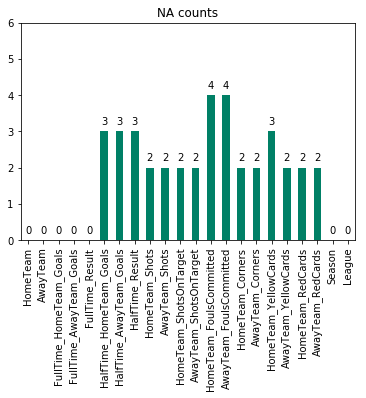

In [94]:
plt.cla()
plt.clf()
missing_data = data.isnull().sum()
ax = missing_data.plot(kind = 'bar', colormap='summer')
ax.set_ylim(0, 6)
plt.title("NA counts")
for p in ax.patches:
    ax.annotate("%.0f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')
plt.show()

So we have a few rows with null values for certain columns

Lets try populating the null values now

We can assume that Half Time Results/Goals were in line with Full Time results/goals whenever Half Time data is empty

In [95]:
data['HalfTime_Result'] = data.apply(
    lambda row: row['FullTime_Result'] if pd.isnull(row['HalfTime_Result']) else row['HalfTime_Result'],
    axis=1
)
data['HalfTime_HomeTeam_Goals'] = data.apply(
    lambda row: row['FullTime_HomeTeam_Goals'] if pd.isnull(row['HalfTime_HomeTeam_Goals']) else row['HalfTime_HomeTeam_Goals'],
    axis=1
)
data['HalfTime_AwayTeam_Goals'] = data.apply(
    lambda row: row['FullTime_AwayTeam_Goals'] if pd.isnull(row['HalfTime_AwayTeam_Goals']) else row['HalfTime_AwayTeam_Goals'],
    axis=1
)

When data is missing we can assume that total no of shots/shots on target is same as the number of goals

In [96]:
data['HomeTeam_Shots'] = data.apply(
    lambda row: row['FullTime_HomeTeam_Goals'] if pd.isnull(row['HomeTeam_Shots']) else row['HomeTeam_Shots'],
    axis=1
)
data['HomeTeam_ShotsOnTarget'] = data.apply(
    lambda row: row['FullTime_HomeTeam_Goals'] if pd.isnull(row['HomeTeam_ShotsOnTarget']) else row['HomeTeam_ShotsOnTarget'],
    axis=1
)
data['AwayTeam_Shots'] = data.apply(
    lambda row: row['FullTime_AwayTeam_Goals'] if pd.isnull(row['AwayTeam_Shots']) else row['AwayTeam_Shots'],
    axis=1
)
data['AwayTeam_ShotsOnTarget'] = data.apply(
    lambda row: row['FullTime_AwayTeam_Goals'] if pd.isnull(row['AwayTeam_ShotsOnTarget']) else row['AwayTeam_ShotsOnTarget'],
    axis=1
)

Fouls committed, corners and red/yellow cards missing data can be populated based on average number of fouls committed/red or yellow cards in other matches involving these teams

In [97]:
fouls_missing = data[(data['HomeTeam_FoulsCommitted'].isnull()) | (data['AwayTeam_FoulsCommitted'].isnull())]
display(HTML(fouls_missing.to_html()))

,HomeTeam,AwayTeam,FullTime_HomeTeam_Goals,FullTime_AwayTeam_Goals,FullTime_Result,HalfTime_HomeTeam_Goals,HalfTime_AwayTeam_Goals,HalfTime_Result,HomeTeam_Shots,AwayTeam_Shots,HomeTeam_ShotsOnTarget,AwayTeam_ShotsOnTarget,HomeTeam_FoulsCommitted,AwayTeam_FoulsCommitted,HomeTeam_Corners,AwayTeam_Corners,HomeTeam_YellowCards,AwayTeam_YellowCards,HomeTeam_RedCards,AwayTeam_RedCards,Season,League
Date,,,,,,,,,,,,,,,,,,,,,,
23/09/12,Cagliari,Roma,0,3,A,0.0,3.0,A,0.0,3.0,0.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2012-2013,SerieA
18/09/11,Lyon,Marseille,2,0,H,2.0,0.0,H,10.0,6.0,5.0,3.0,NaN,NaN,3.0,5.0,0.0,3.0,0.0,0.0,2011-2012,Ligue1
17/12/11,Caen,Nancy,1,2,A,0.0,1.0,A,9.0,9.0,1.0,3.0,NaN,NaN,8.0,1.0,2.0,5.0,0.0,0.0,2011-2012,Ligue1
16/04/17,Bastia,Lyon,0,3,A,0.0,3.0,A,0.0,3.0,0.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2016-2017,Ligue1


In [98]:
avg_foul_data = data.groupby(['HomeTeam','AwayTeam'])['HomeTeam_FoulsCommitted','AwayTeam_FoulsCommitted'].mean()

In [99]:
is_cagliary_vs_roma = ((data['HomeTeam']=='Cagliari') & (data['AwayTeam']=='Roma')) 

data.loc[(data['HomeTeam_FoulsCommitted'].isnull()) & (is_cagliary_vs_roma),'HomeTeam_FoulsCommitted']=avg_foul_data.loc[('Cagliari','Roma')]['HomeTeam_FoulsCommitted']
data.loc[(data['AwayTeam_FoulsCommitted'].isnull()) & (is_cagliary_vs_roma),'AwayTeam_FoulsCommitted']=avg_foul_data.loc[('Cagliari','Roma')]['AwayTeam_FoulsCommitted']

In [100]:
is_lyon_vs_marseille = ((data['HomeTeam']=='Lyon') & (data['AwayTeam']=='Marseille'))

data.loc[(data['HomeTeam_FoulsCommitted'].isnull()) & (is_lyon_vs_marseille),'HomeTeam_FoulsCommitted']=avg_foul_data.loc[('Lyon','Marseille')]['HomeTeam_FoulsCommitted']
data.loc[(data['AwayTeam_FoulsCommitted'].isnull()) & (is_lyon_vs_marseille),'AwayTeam_FoulsCommitted']=avg_foul_data.loc[('Lyon','Marseille')]['AwayTeam_FoulsCommitted']

In [101]:
is_caen_vs_nancy = ((data['HomeTeam']=='Caen') & (data['AwayTeam']=='Nancy'))

data.loc[(data['HomeTeam_FoulsCommitted'].isnull()) & (is_caen_vs_nancy),'HomeTeam_FoulsCommitted']=avg_foul_data.loc[('Caen','Nancy')]['HomeTeam_FoulsCommitted']
data.loc[(data['AwayTeam_FoulsCommitted'].isnull()) & (is_caen_vs_nancy),'AwayTeam_FoulsCommitted']=avg_foul_data.loc[('Caen','Nancy')]['AwayTeam_FoulsCommitted']

In [102]:
is_bastia_vs_lyon = ((data['HomeTeam']=='Bastia') & (data['AwayTeam']=='Lyon'))

data.loc[(data['HomeTeam_FoulsCommitted'].isnull()) & (is_bastia_vs_lyon),'HomeTeam_FoulsCommitted']=avg_foul_data.loc[('Bastia','Lyon')]['HomeTeam_FoulsCommitted']
data.loc[(data['AwayTeam_FoulsCommitted'].isnull()) & (is_bastia_vs_lyon),'AwayTeam_FoulsCommitted']=avg_foul_data.loc[('Bastia','Lyon')]['AwayTeam_FoulsCommitted']

In [103]:
cards_missing = data[(data['HomeTeam_YellowCards'].isnull()) | (data['AwayTeam_YellowCards'].isnull()) | (data['HomeTeam_RedCards'].isnull()) | (data['AwayTeam_RedCards'].isnull())]
display(HTML(cards_missing.to_html()))

,HomeTeam,AwayTeam,FullTime_HomeTeam_Goals,FullTime_AwayTeam_Goals,FullTime_Result,HalfTime_HomeTeam_Goals,HalfTime_AwayTeam_Goals,HalfTime_Result,HomeTeam_Shots,AwayTeam_Shots,HomeTeam_ShotsOnTarget,AwayTeam_ShotsOnTarget,HomeTeam_FoulsCommitted,AwayTeam_FoulsCommitted,HomeTeam_Corners,AwayTeam_Corners,HomeTeam_YellowCards,AwayTeam_YellowCards,HomeTeam_RedCards,AwayTeam_RedCards,Season,League
Date,,,,,,,,,,,,,,,,,,,,,,
23/09/12,Cagliari,Roma,0,3,A,0.0,3.0,A,0.0,3.0,0.0,3.0,14.833333,11.666667,NaN,NaN,NaN,NaN,NaN,NaN,2012-2013,SerieA
02/03/15,Roma,Juventus,1,1,D,0.0,0.0,D,8.0,10.0,3.0,1.0,11.000000,16.000000,1.0,5.0,NaN,5.0,1.0,0.0,2014-2015,SerieA
16/04/17,Bastia,Lyon,0,3,A,0.0,3.0,A,0.0,3.0,0.0,3.0,14.250000,14.750000,NaN,NaN,NaN,NaN,NaN,NaN,2016-2017,Ligue1


In [104]:
avg_card_data = data.groupby(['HomeTeam','AwayTeam'])['HomeTeam_YellowCards','HomeTeam_RedCards','AwayTeam_YellowCards','AwayTeam_RedCards'].mean()

In [105]:
is_cagliary_vs_roma = ((data['HomeTeam']=='Cagliari') & (data['AwayTeam']=='Roma')) 

data.loc[(data['HomeTeam_YellowCards'].isnull()) & (is_cagliary_vs_roma),'HomeTeam_YellowCards']=avg_card_data.loc[('Cagliari','Roma')]['HomeTeam_YellowCards']
data.loc[(data['HomeTeam_RedCards'].isnull()) & (is_cagliary_vs_roma),'HomeTeam_RedCards']=avg_card_data.loc[('Cagliari','Roma')]['HomeTeam_RedCards']

data.loc[(data['AwayTeam_YellowCards'].isnull()) & (is_cagliary_vs_roma),'AwayTeam_YellowCards']=avg_card_data.loc[('Cagliari','Roma')]['AwayTeam_YellowCards']
data.loc[(data['AwayTeam_RedCards'].isnull()) & (is_cagliary_vs_roma),'AwayTeam_RedCards']=avg_card_data.loc[('Cagliari','Roma')]['AwayTeam_RedCards']

In [106]:
is_roma_vs_juventus = ((data['HomeTeam']=='Roma') & (data['AwayTeam']=='Juventus')) 

data.loc[(data['HomeTeam_YellowCards'].isnull()) & (is_roma_vs_juventus),'HomeTeam_YellowCards']=avg_card_data.loc[('Roma','Juventus')]['HomeTeam_YellowCards']
data.loc[(data['HomeTeam_RedCards'].isnull()) & (is_roma_vs_juventus),'HomeTeam_RedCards']=avg_card_data.loc[('Roma','Juventus')]['HomeTeam_RedCards']

data.loc[(data['AwayTeam_YellowCards'].isnull()) & (is_roma_vs_juventus),'AwayTeam_YellowCards']=avg_card_data.loc[('Roma','Juventus')]['AwayTeam_YellowCards']
data.loc[(data['AwayTeam_RedCards'].isnull()) & (is_roma_vs_juventus),'AwayTeam_RedCards']=avg_card_data.loc[('Roma','Juventus')]['AwayTeam_RedCards']

In [107]:
is_bastia_vs_lyon = ((data['HomeTeam']=='Bastia') & (data['AwayTeam']=='Lyon')) 

data.loc[(data['HomeTeam_YellowCards'].isnull()) & (is_bastia_vs_lyon),'HomeTeam_YellowCards']=avg_card_data.loc[('Bastia','Lyon')]['HomeTeam_YellowCards']
data.loc[(data['HomeTeam_RedCards'].isnull()) & (is_bastia_vs_lyon),'HomeTeam_RedCards']=avg_card_data.loc[('Bastia','Lyon')]['HomeTeam_RedCards']

data.loc[(data['AwayTeam_YellowCards'].isnull()) & (is_bastia_vs_lyon),'AwayTeam_YellowCards']=avg_card_data.loc[('Bastia','Lyon')]['AwayTeam_YellowCards']
data.loc[(data['AwayTeam_RedCards'].isnull()) & (is_bastia_vs_lyon),'AwayTeam_RedCards']=avg_card_data.loc[('Bastia','Lyon')]['AwayTeam_RedCards']

In [108]:
corners_missing = data[(data['HomeTeam_Corners'].isnull()) | (data['AwayTeam_Corners'].isnull())  ]
display(HTML(corners_missing.to_html()))

,HomeTeam,AwayTeam,FullTime_HomeTeam_Goals,FullTime_AwayTeam_Goals,FullTime_Result,HalfTime_HomeTeam_Goals,HalfTime_AwayTeam_Goals,HalfTime_Result,HomeTeam_Shots,AwayTeam_Shots,HomeTeam_ShotsOnTarget,AwayTeam_ShotsOnTarget,HomeTeam_FoulsCommitted,AwayTeam_FoulsCommitted,HomeTeam_Corners,AwayTeam_Corners,HomeTeam_YellowCards,AwayTeam_YellowCards,HomeTeam_RedCards,AwayTeam_RedCards,Season,League
Date,,,,,,,,,,,,,,,,,,,,,,
23/09/12,Cagliari,Roma,0,3,A,0.0,3.0,A,0.0,3.0,0.0,3.0,14.833333,11.666667,NaN,NaN,2.666667,2.333333,0.0,0.166667,2012-2013,SerieA
16/04/17,Bastia,Lyon,0,3,A,0.0,3.0,A,0.0,3.0,0.0,3.0,14.250000,14.750000,NaN,NaN,2.500000,1.250000,0.5,0.000000,2016-2017,Ligue1


In [109]:
avg_corner_data = data.groupby(['HomeTeam','AwayTeam'])['HomeTeam_Corners','AwayTeam_Corners'].mean()

In [110]:
is_cagliary_vs_roma = ((data['HomeTeam']=='Cagliari') & (data['AwayTeam']=='Roma')) 

data.loc[(data['HomeTeam_Corners'].isnull()) & (is_cagliary_vs_roma),'HomeTeam_Corners']=avg_corner_data.loc[('Cagliari','Roma')]['HomeTeam_Corners']
data.loc[(data['AwayTeam_Corners'].isnull()) & (is_cagliary_vs_roma),'AwayTeam_Corners']=avg_corner_data.loc[('Cagliari','Roma')]['AwayTeam_Corners']

In [111]:
is_bastia_vs_lyon = ((data['HomeTeam']=='Bastia') & (data['AwayTeam']=='Lyon')) 

data.loc[(data['HomeTeam_Corners'].isnull()) & (is_bastia_vs_lyon),'HomeTeam_Corners']=avg_corner_data.loc[('Cagliari','Roma')]['HomeTeam_Corners']
data.loc[(data['AwayTeam_Corners'].isnull()) & (is_bastia_vs_lyon),'AwayTeam_Corners']=avg_corner_data.loc[('Cagliari','Roma')]['AwayTeam_Corners']

Now there should not be any row/column with null values

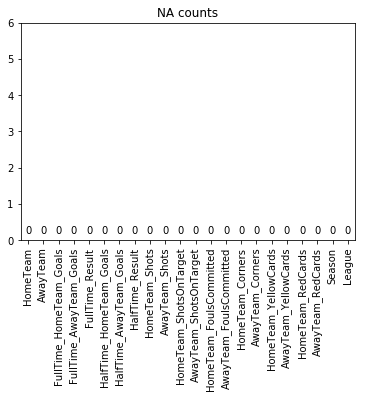

In [112]:
plt.cla()
plt.clf()
missing_data = data.isnull().sum()
ax = missing_data.plot(kind = 'bar', colormap='summer')
ax.set_ylim(0, 6)
plt.title("NA counts")
for p in ax.patches:
    ax.annotate("%.0f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')
plt.show()

As expected, there are no null values now. All the null values have been cleaned up

## Feature Engineering

Now lets add the following extra columns :
1. Winner : if FullTime_Result = 'H', then its Home Team. if FullTime_Result = 'A', then its Away Team. Elese its null (implying draw)
2. Goal Difference (Home Team) : Full Time Home Team Goals - Full Time Away Team Goals
3. Goal Difference (Away Team) : Full Time Away Team Goals - Full Time Home Team Goals
4. Total Cards (Home Team) : Home Team Yellow Cards + Home Team Red Cards
5. Total Cards (Away Team) : Away Team Yellow Cards + Away Team Red Cards
6. Percentage of Shots on Target (Home team): Home team shots on Target/Home team shots
7. Percentage of Shots on Target (Away team): Away team shots on Target/Away team shots
8. Home Team Goal saves = Away team shots on target - Full Time Away Team Goals
9. Away Team Goal saves = Home team shots on target - Full Time Home Team Goals

In [113]:
data['Winner']=np.NaN
data['Winner'] = data.apply(
    lambda row: row['HomeTeam'] if row['FullTime_Result']=='H' else row['AwayTeam'] if row['FullTime_Result']=='A' else np.NaN,
    axis=1
)

In [114]:
data['HomeTeam_GoalDiff'] = data['FullTime_HomeTeam_Goals']-data['FullTime_AwayTeam_Goals']
data['AwayTeam_GoalDiff'] = data['FullTime_AwayTeam_Goals']-data['FullTime_HomeTeam_Goals']

In [115]:
data['HomeTeam_TotalCards'] = data['HomeTeam_YellowCards'] + data['HomeTeam_RedCards']
data['AwayTeam_TotalCards'] = data['AwayTeam_YellowCards'] + data['AwayTeam_RedCards']

In [116]:
data['HomeTeam_ShotsOnTarget_Percent'] = data['HomeTeam_ShotsOnTarget']*100/data['HomeTeam_Shots']
data['AwayTeam_ShotsOnTarget_Percent'] = data['AwayTeam_ShotsOnTarget']*100/data['AwayTeam_Shots']

In [117]:
data['HomeTeam_GoalSaves'] = data['AwayTeam_ShotsOnTarget'] - data['FullTime_AwayTeam_Goals']
data['AwayTeam_GoalSaves'] = data['HomeTeam_ShotsOnTarget'] - data['FullTime_HomeTeam_Goals']

In [118]:
display(HTML(data.head().to_html()))

,HomeTeam,AwayTeam,FullTime_HomeTeam_Goals,FullTime_AwayTeam_Goals,FullTime_Result,HalfTime_HomeTeam_Goals,HalfTime_AwayTeam_Goals,HalfTime_Result,HomeTeam_Shots,AwayTeam_Shots,HomeTeam_ShotsOnTarget,AwayTeam_ShotsOnTarget,HomeTeam_FoulsCommitted,AwayTeam_FoulsCommitted,HomeTeam_Corners,AwayTeam_Corners,HomeTeam_YellowCards,AwayTeam_YellowCards,HomeTeam_RedCards,AwayTeam_RedCards,Season,League,Winner,HomeTeam_GoalDiff,AwayTeam_GoalDiff,HomeTeam_TotalCards,AwayTeam_TotalCards,HomeTeam_ShotsOnTarget_Percent,AwayTeam_ShotsOnTarget_Percent,HomeTeam_GoalSaves,AwayTeam_GoalSaves
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2010-08-14,Aston Villa,West Ham,3,0,H,2.0,0.0,H,23.0,12.0,11.0,2.0,15.0,15.0,16.0,7.0,1.0,2.0,0.0,0.0,2010-2011,EPL,Aston Villa,3,-3,1.0,2.0,47.826087,16.666667,2.0,8.0
2010-08-14,Blackburn,Everton,1,0,H,1.0,0.0,H,7.0,17.0,2.0,12.0,19.0,14.0,1.0,3.0,2.0,1.0,0.0,0.0,2010-2011,EPL,Blackburn,1,-1,2.0,1.0,28.571429,70.588235,12.0,1.0
2010-08-14,Bolton,Fulham,0,0,D,0.0,0.0,D,13.0,12.0,9.0,7.0,12.0,13.0,4.0,8.0,1.0,3.0,0.0,0.0,2010-2011,EPL,NaN,0,0,1.0,3.0,69.230769,58.333333,7.0,9.0
2010-08-14,Chelsea,West Brom,6,0,H,2.0,0.0,H,18.0,10.0,13.0,4.0,10.0,10.0,3.0,1.0,1.0,0.0,0.0,0.0,2010-2011,EPL,Chelsea,6,-6,1.0,0.0,72.222222,40.000000,4.0,7.0
2010-08-14,Sunderland,Birmingham,2,2,D,1.0,0.0,H,6.0,13.0,2.0,7.0,13.0,10.0,3.0,6.0,3.0,3.0,1.0,0.0,2010-2011,EPL,NaN,0,0,4.0,3.0,33.333333,53.846154,5.0,0.0


## Feature Analysis

So finaly we have the following features for analysis

In [119]:
for c in data.columns :
    print(c)

HomeTeam
AwayTeam
FullTime_HomeTeam_Goals
FullTime_AwayTeam_Goals
FullTime_Result
HalfTime_HomeTeam_Goals
HalfTime_AwayTeam_Goals
HalfTime_Result
HomeTeam_Shots
AwayTeam_Shots
HomeTeam_ShotsOnTarget
AwayTeam_ShotsOnTarget
HomeTeam_FoulsCommitted
AwayTeam_FoulsCommitted
HomeTeam_Corners
AwayTeam_Corners
HomeTeam_YellowCards
AwayTeam_YellowCards
HomeTeam_RedCards
AwayTeam_RedCards
Season
League
Winner
HomeTeam_GoalDiff
AwayTeam_GoalDiff
HomeTeam_TotalCards
AwayTeam_TotalCards
HomeTeam_ShotsOnTarget_Percent
AwayTeam_ShotsOnTarget_Percent
HomeTeam_GoalSaves
AwayTeam_GoalSaves
